In [1]:
%matplotlib inline
# from torchvision import datasets
import PIL
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import os
import h5py
from skimage.feature import greycomatrix
from skimage.feature import greycoprops

C:\Users\moham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_path="D:\\train_tomato"

In [3]:
global_features = []
labels = []
bins=8
i, j = 0, 0
k = 0
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(np.array(train_labels).shape)

(3,)


TRAINING_NAME early_blight
current_label early_blight


C:\Users\moham\Anaconda3\lib\site-packages\skimage\feature\texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):
C:\Users\moham\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[STATUS] processed folder: early_blight
GLOBAL FEATURE SHAPE (165, 9)
TRAINING_NAME healthy
current_label healthy
[STATUS] processed folder: healthy
GLOBAL FEATURE SHAPE (330, 9)
TRAINING_NAME late_blight
current_label late_blight
[STATUS] processed folder: late_blight
GLOBAL FEATURE SHAPE (484, 9)
[STATUS] training Labels (484,)


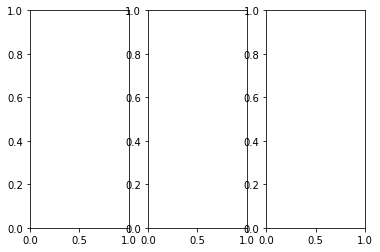

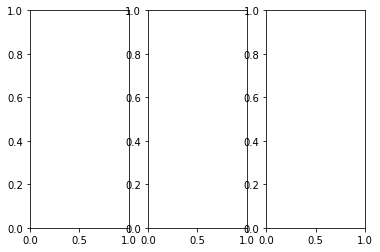

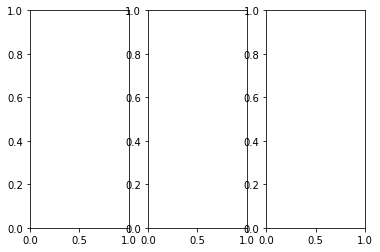

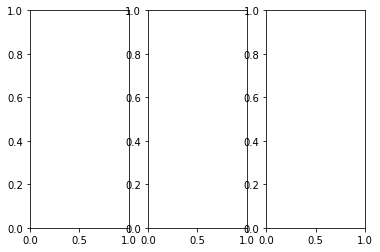

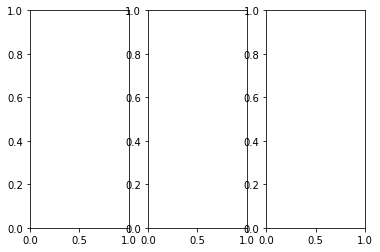

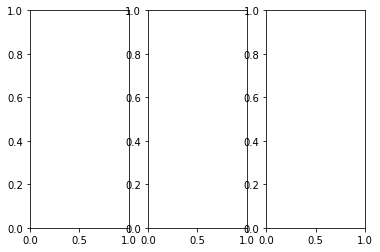

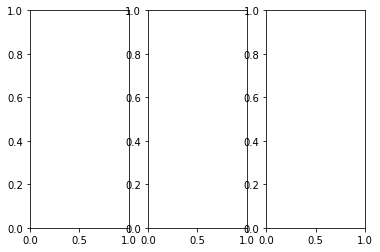

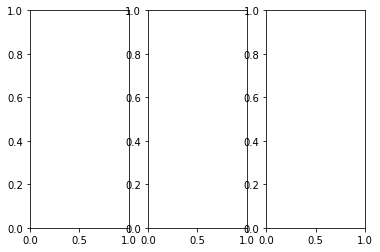

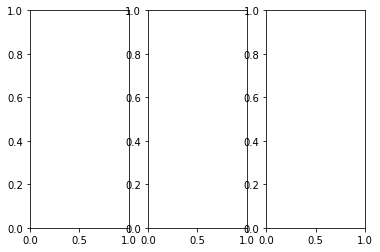

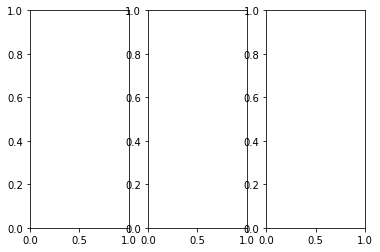

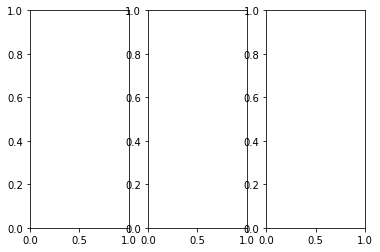

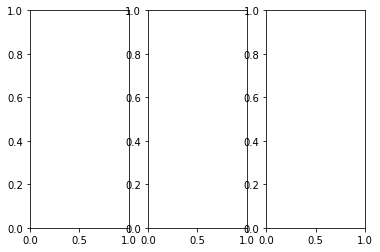

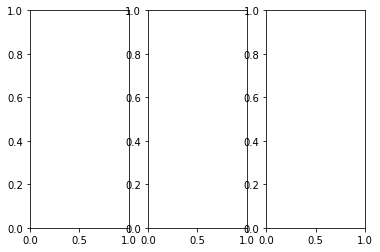

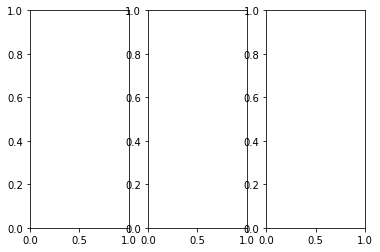

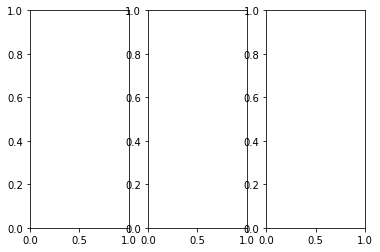

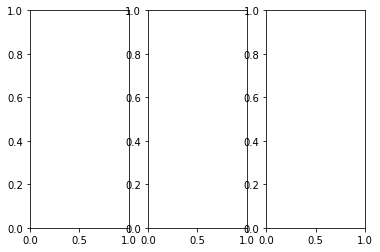

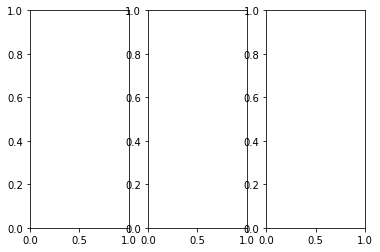

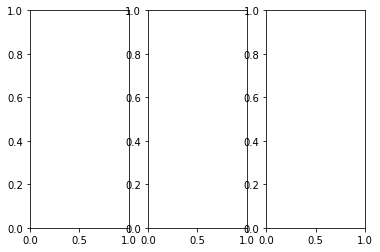

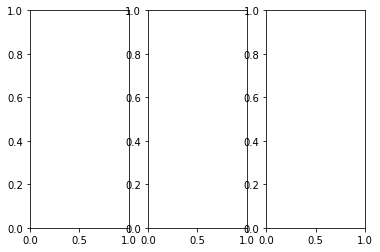

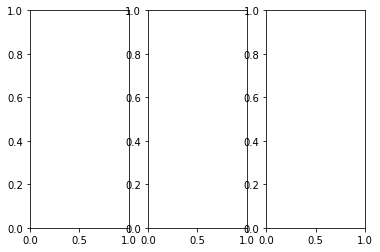

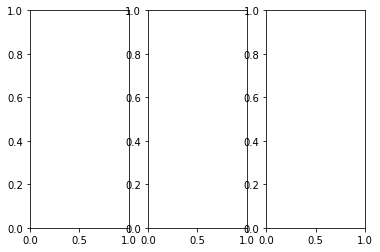

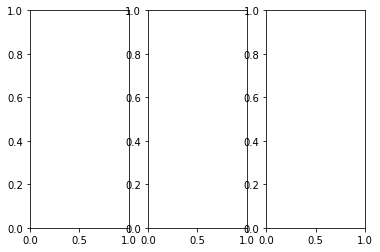

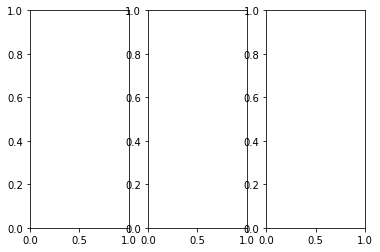

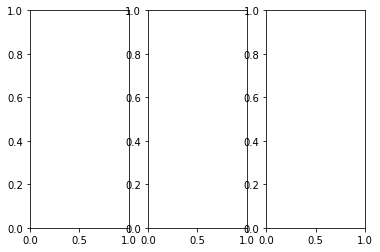

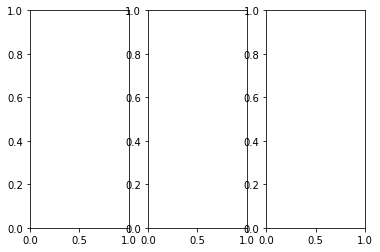

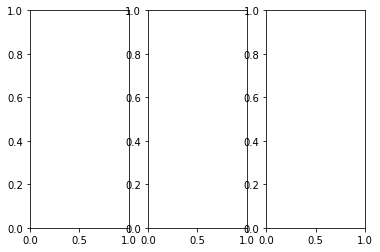

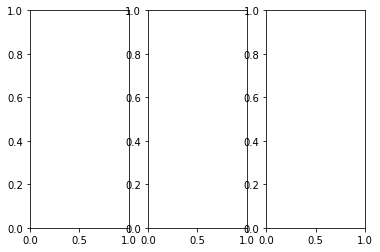

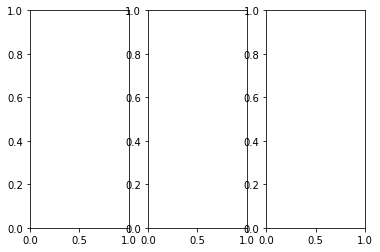

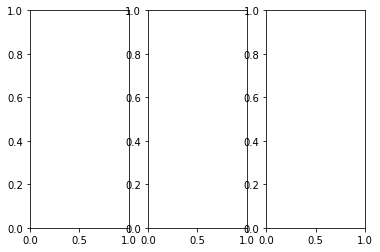

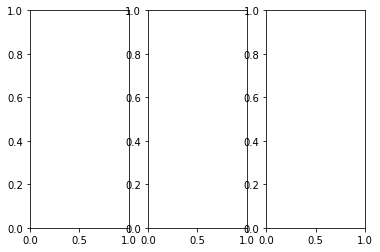

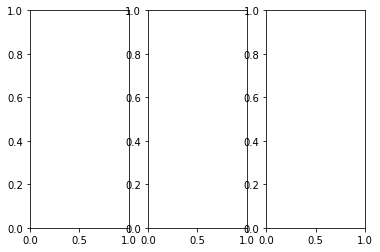

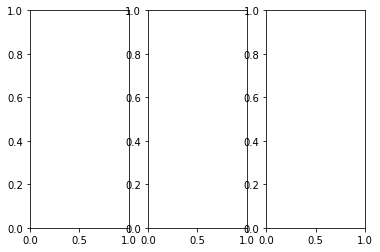

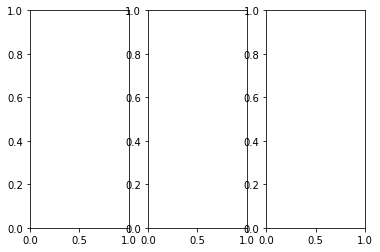

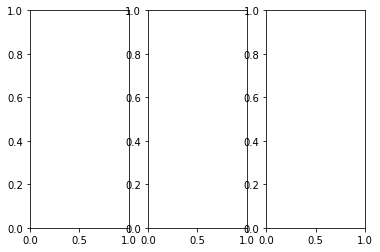

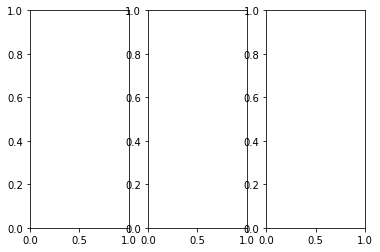

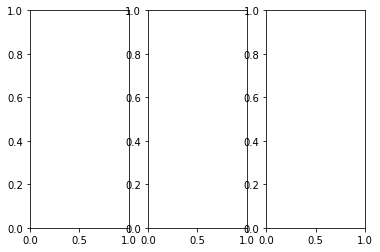

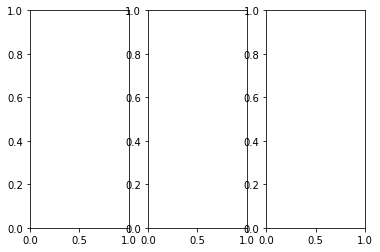

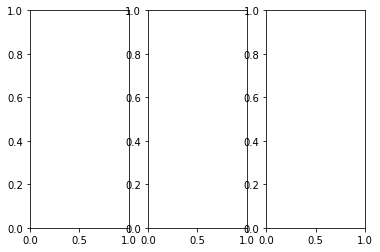

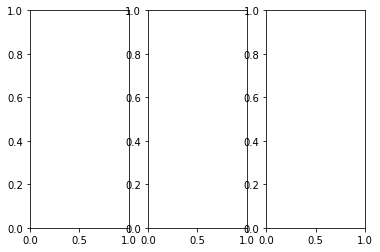

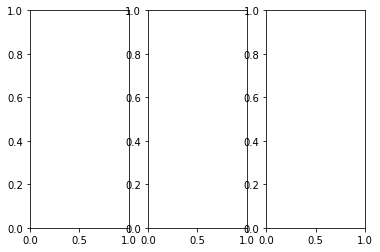

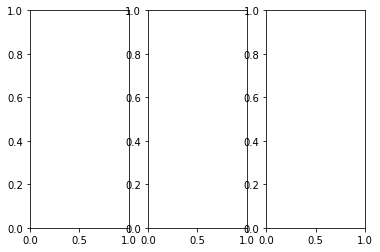

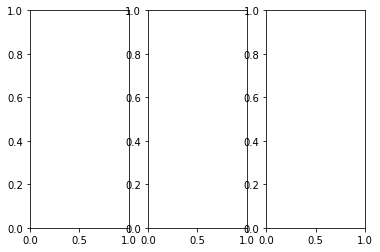

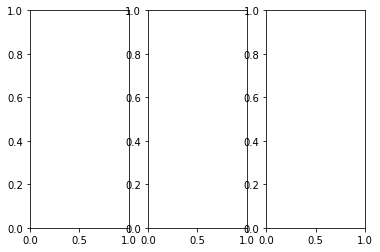

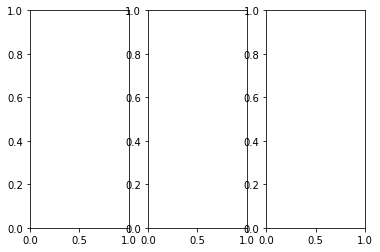

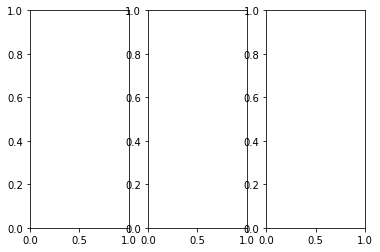

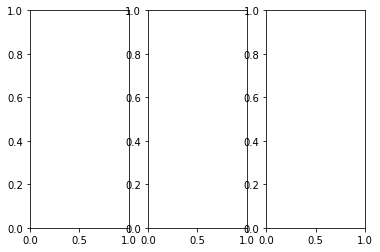

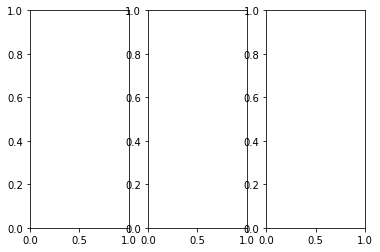

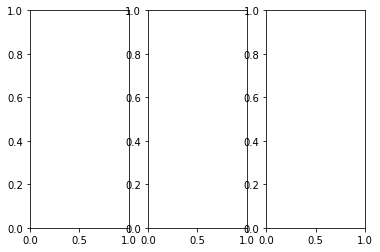

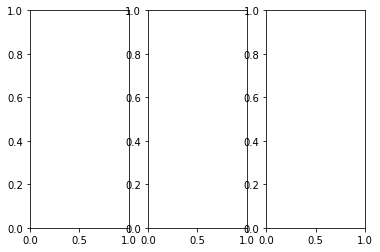

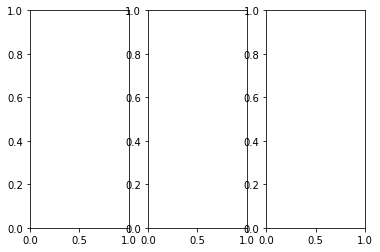

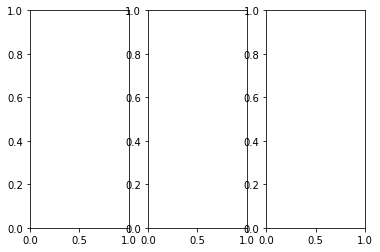

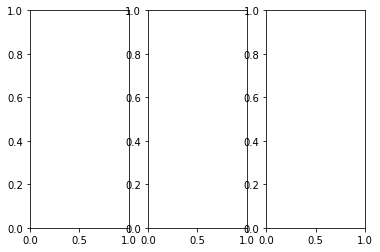

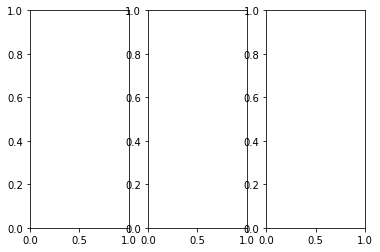

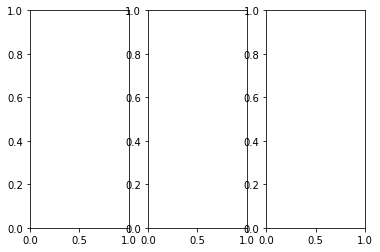

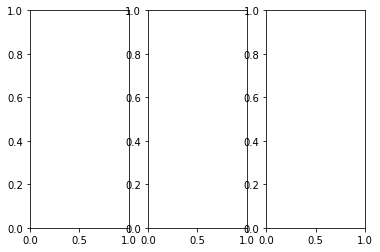

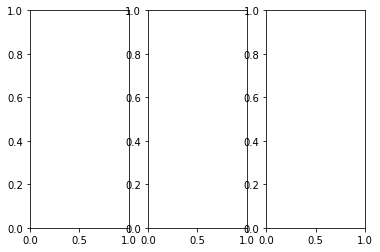

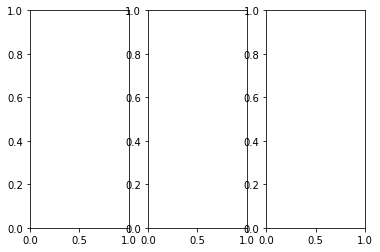

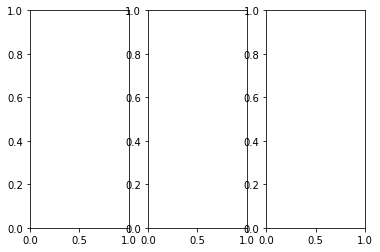

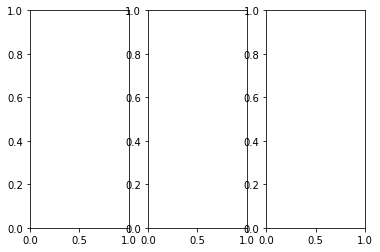

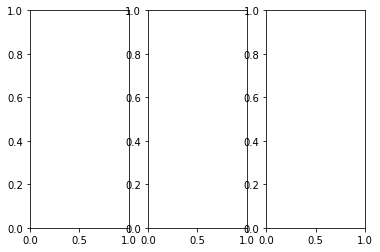

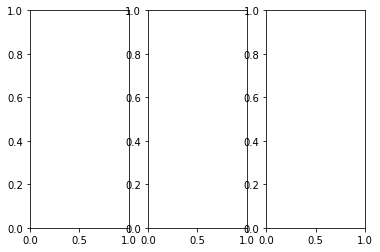

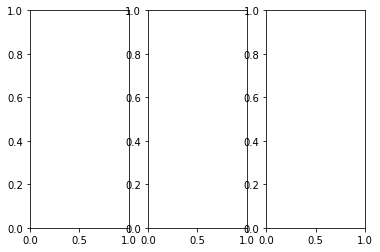

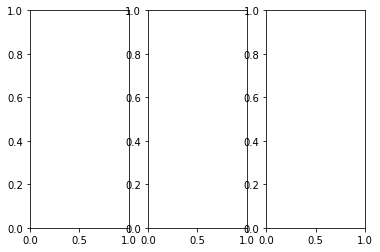

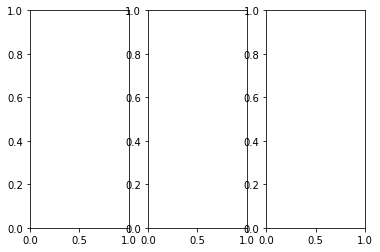

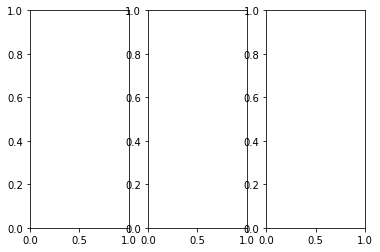

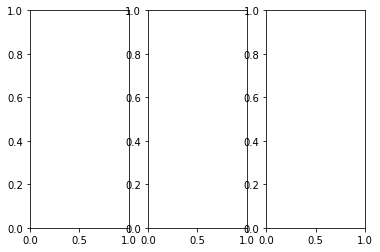

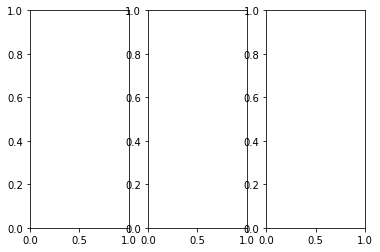

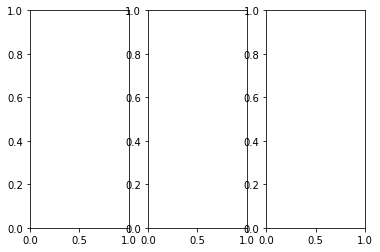

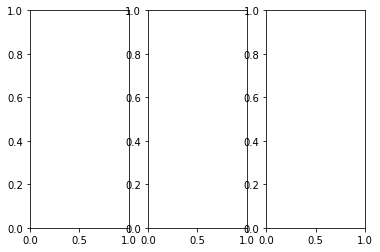

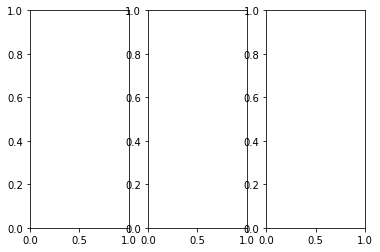

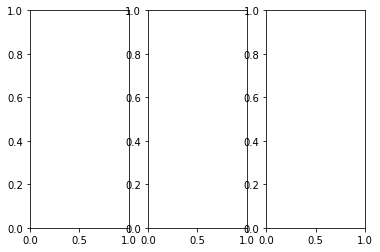

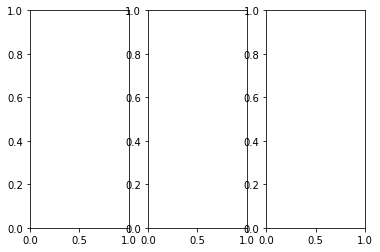

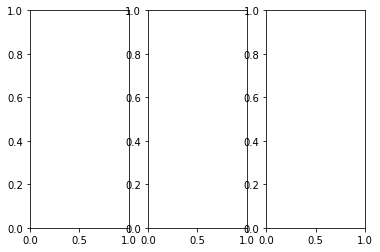

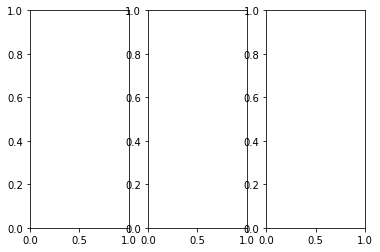

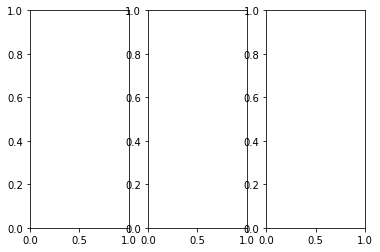

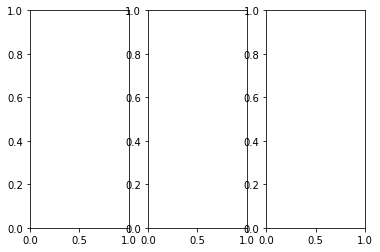

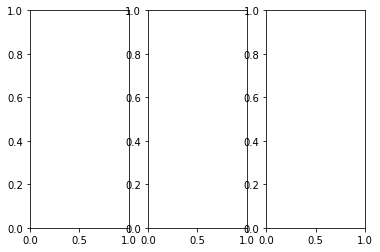

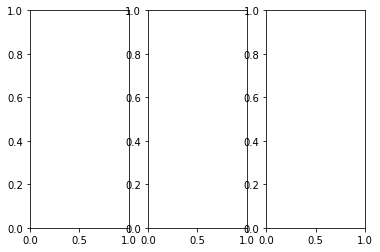

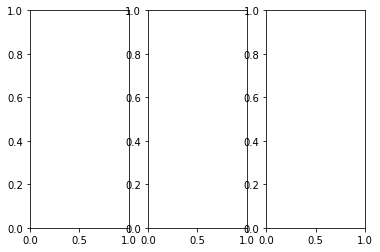

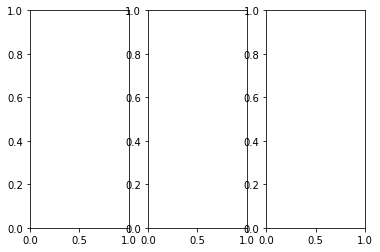

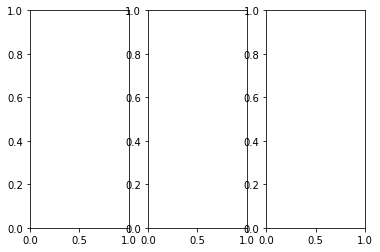

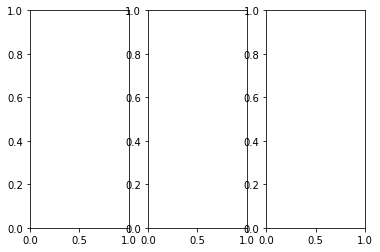

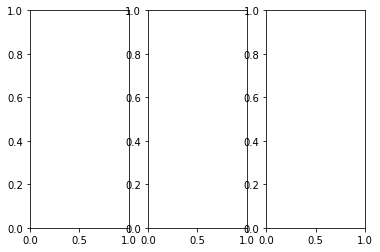

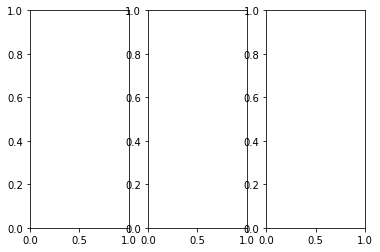

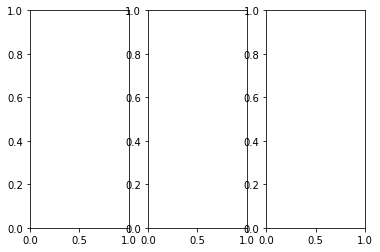

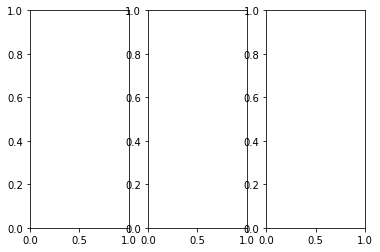

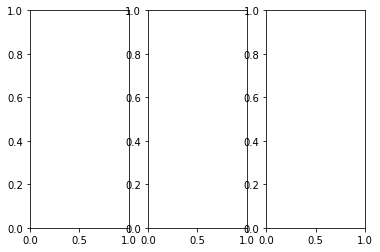

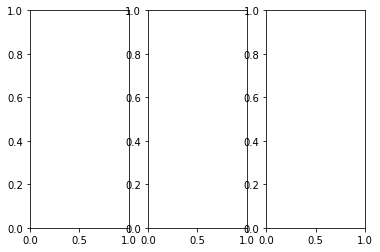

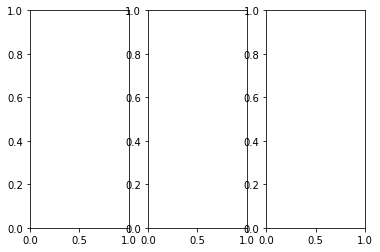

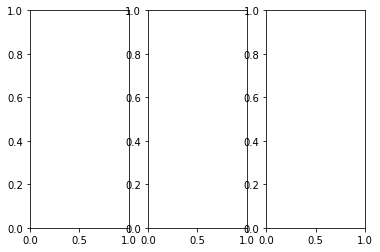

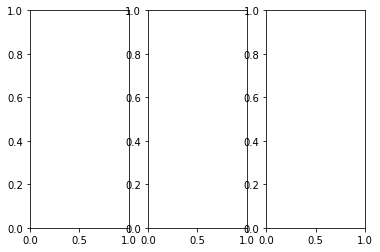

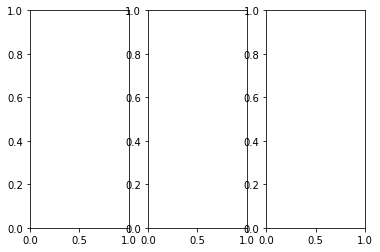

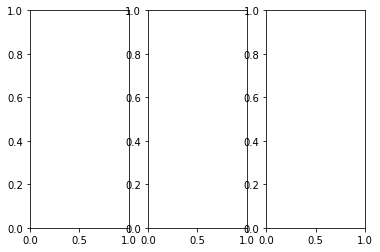

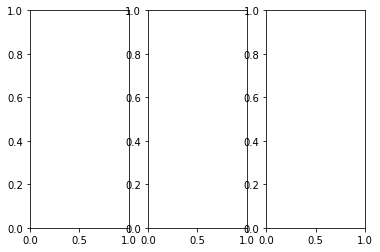

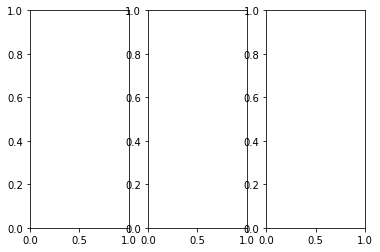

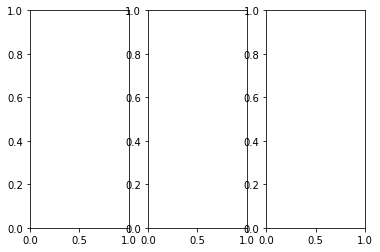

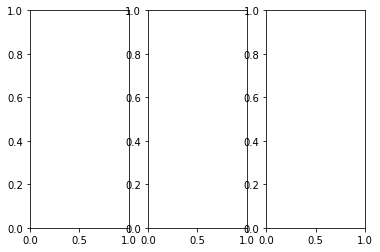

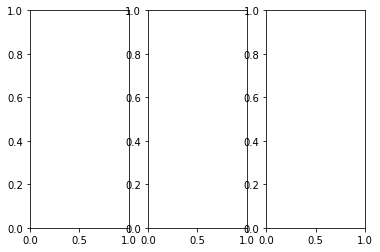

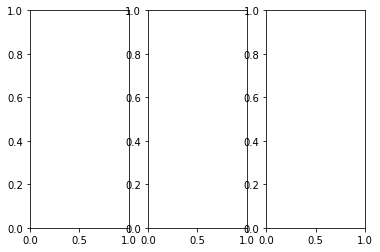

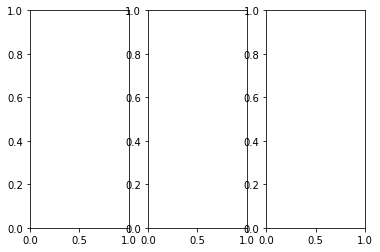

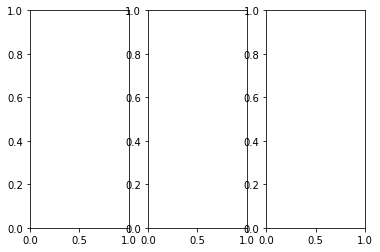

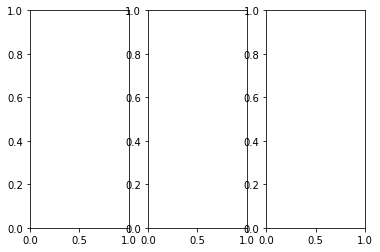

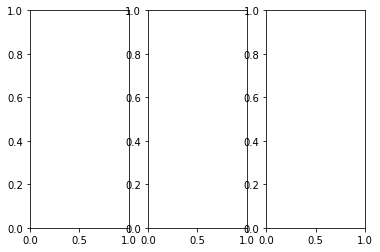

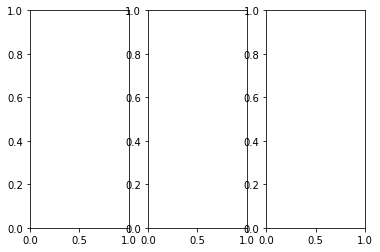

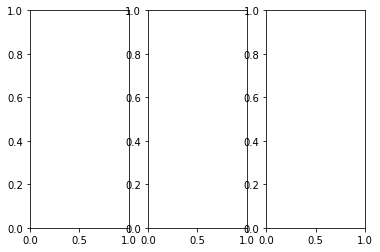

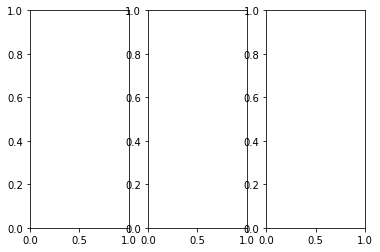

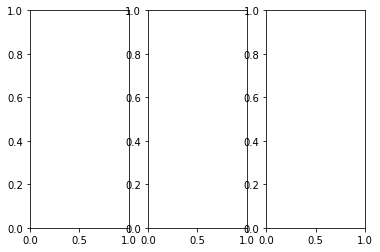

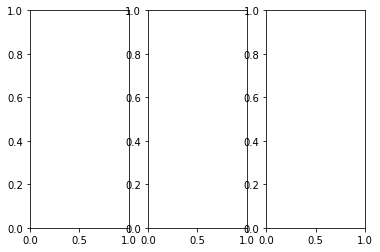

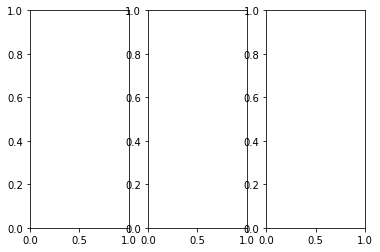

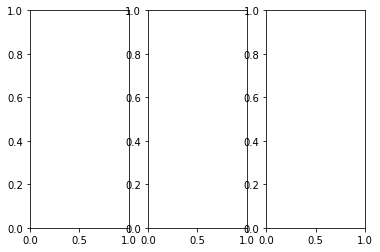

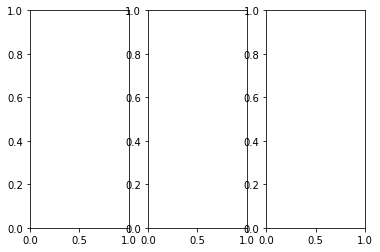

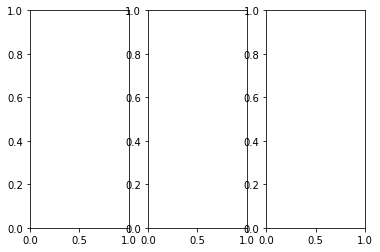

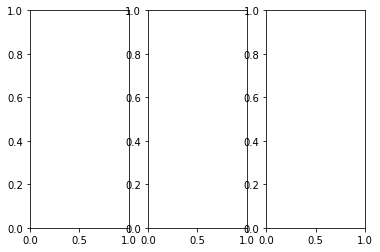

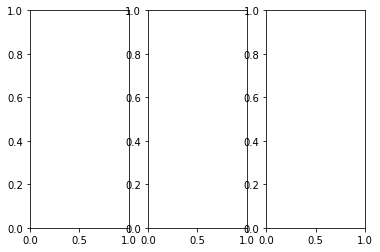

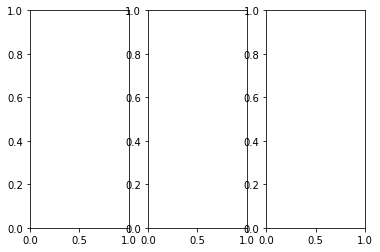

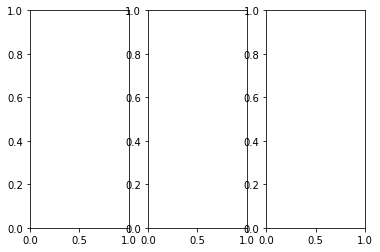

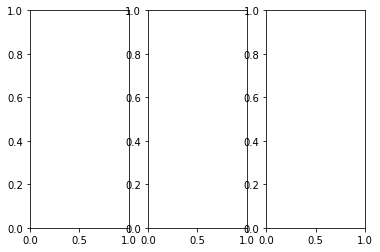

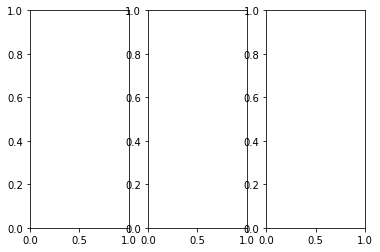

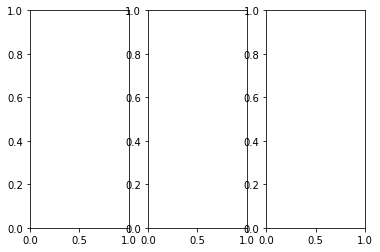

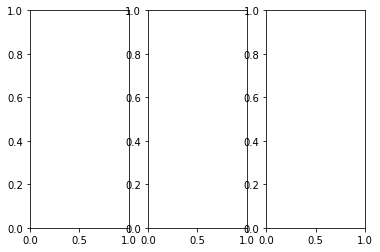

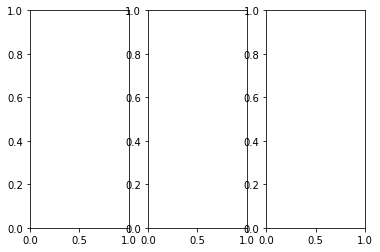

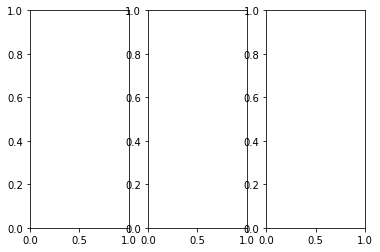

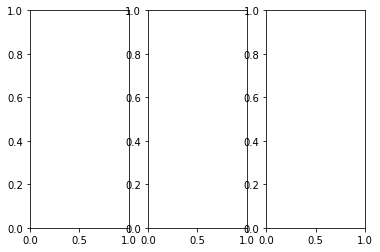

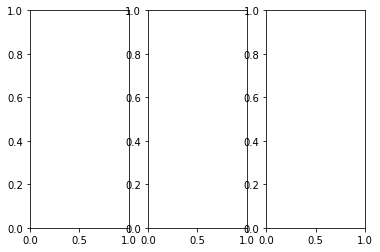

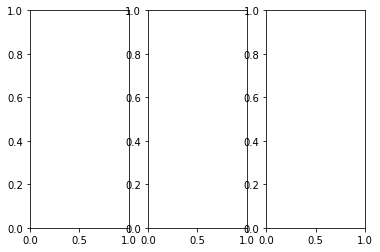

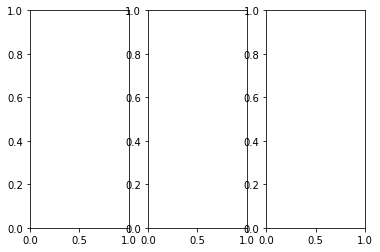

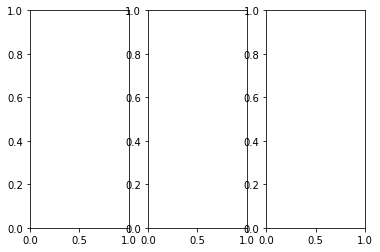

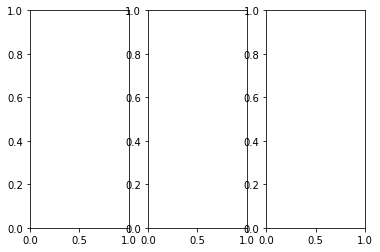

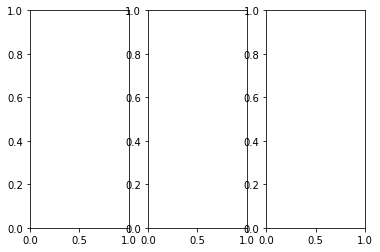

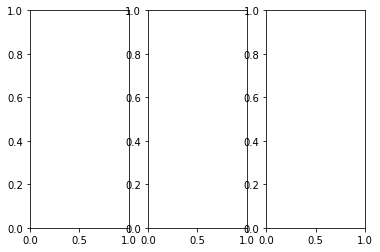

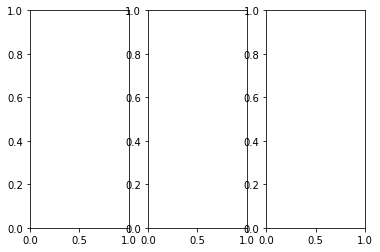

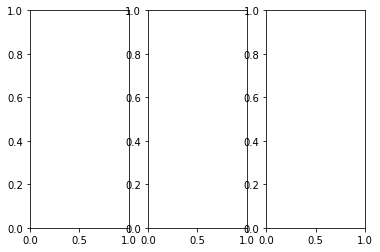

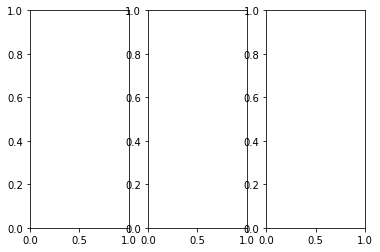

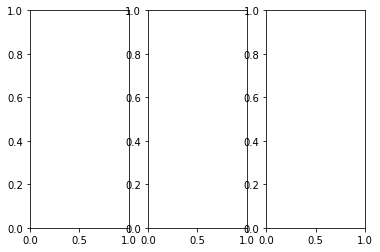

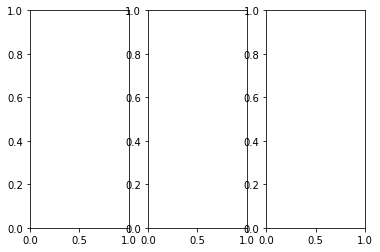

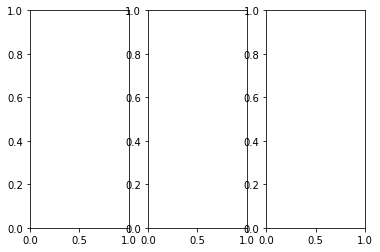

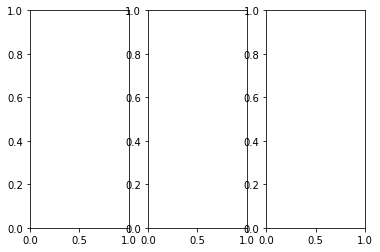

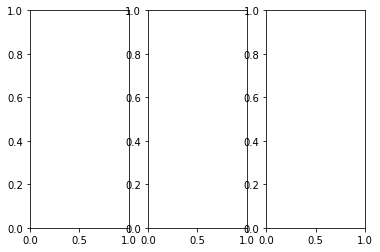

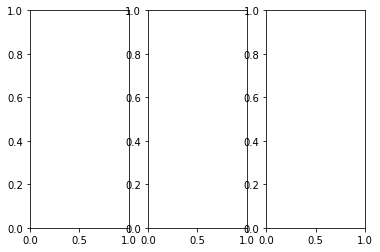

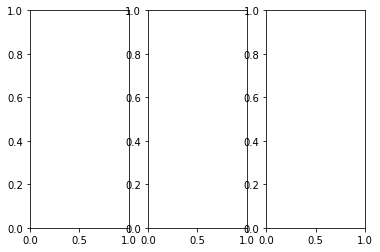

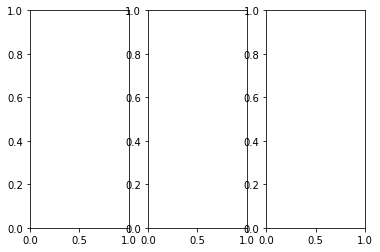

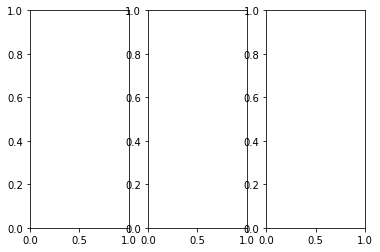

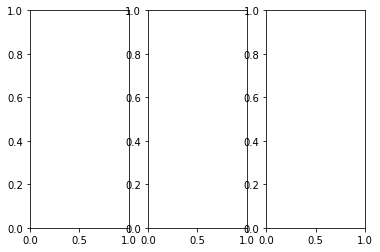

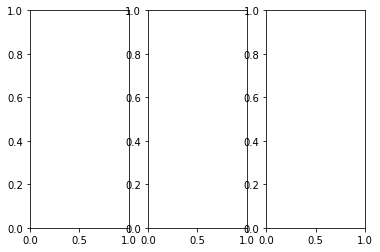

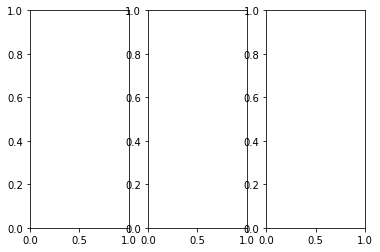

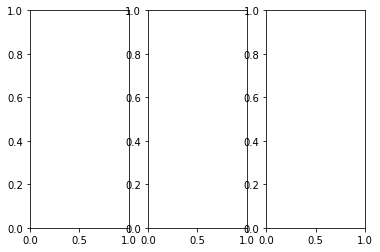

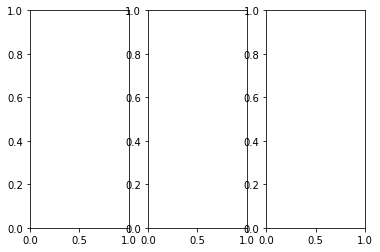

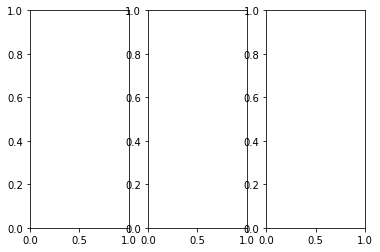

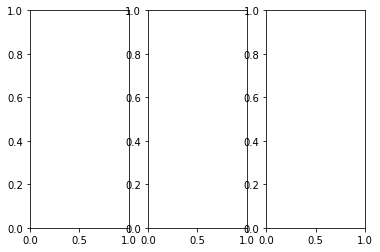

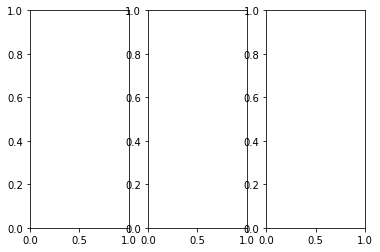

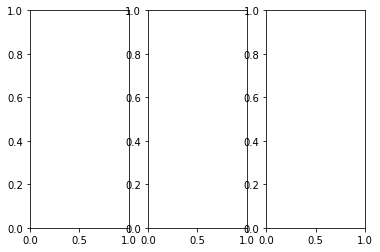

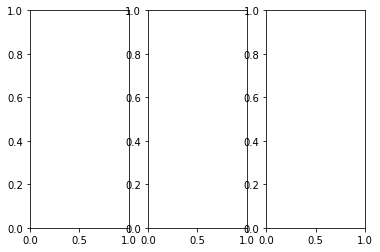

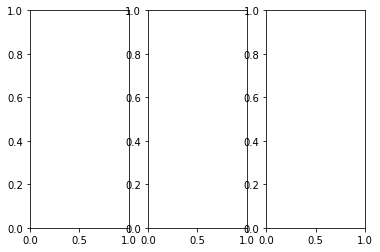

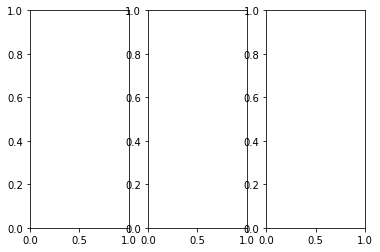

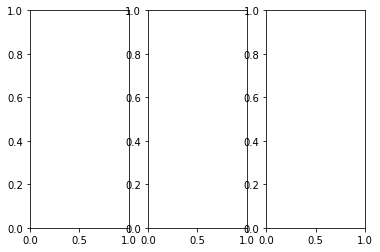

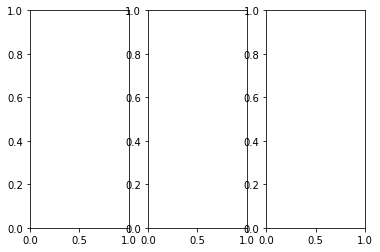

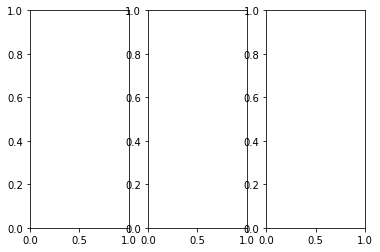

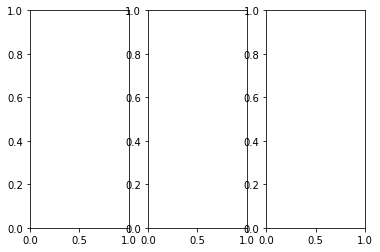

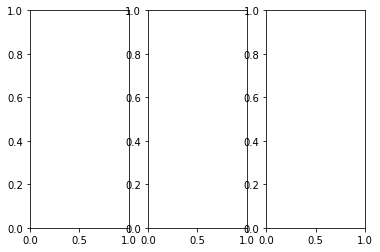

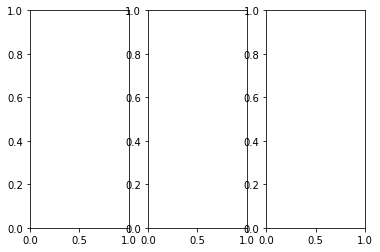

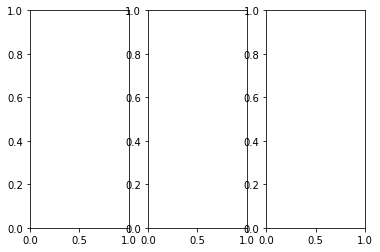

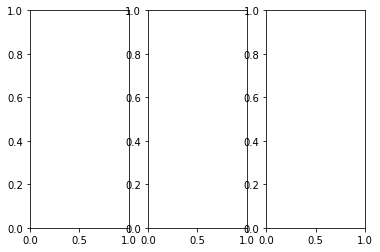

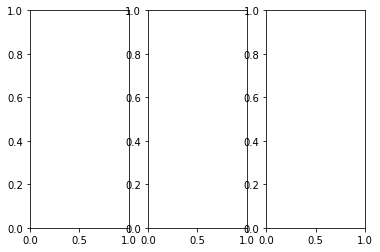

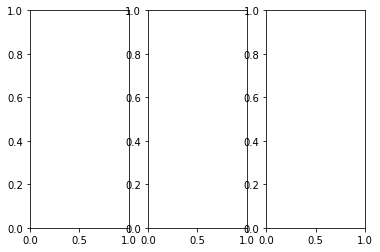

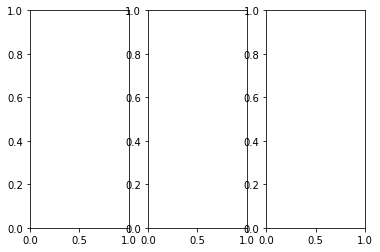

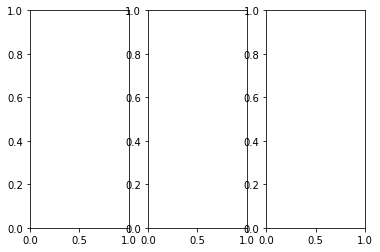

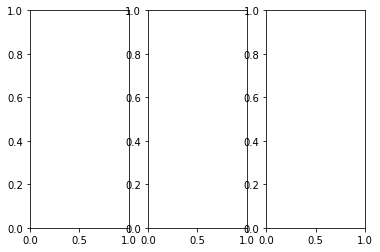

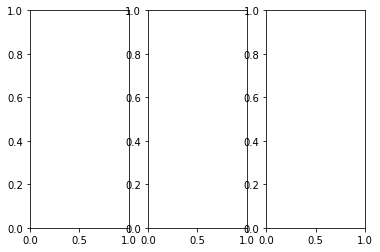

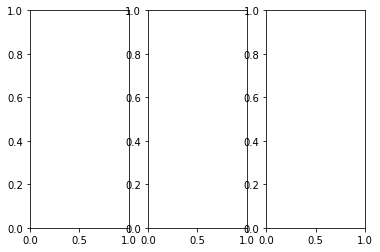

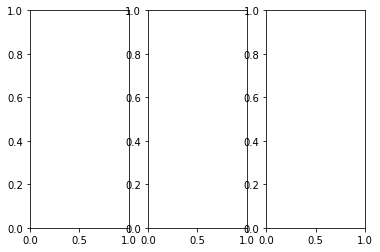

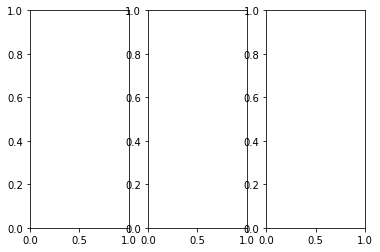

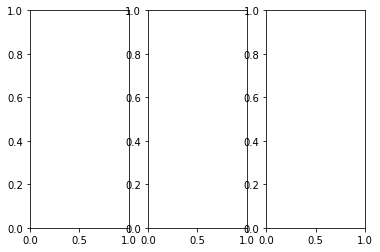

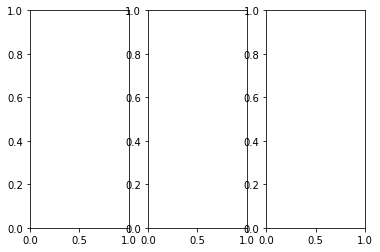

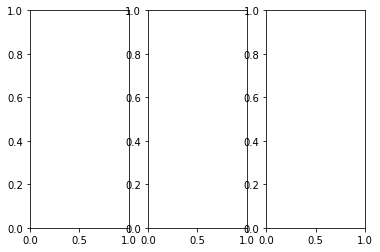

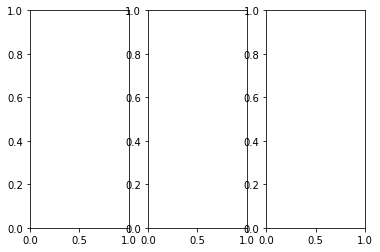

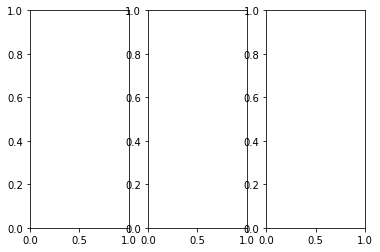

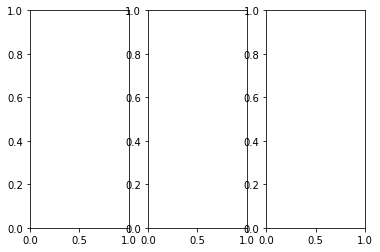

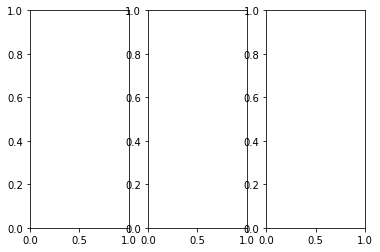

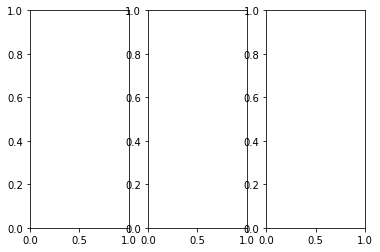

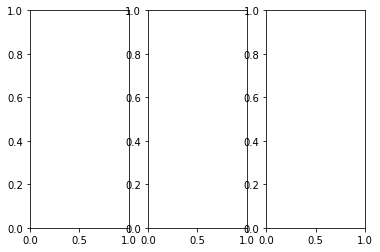

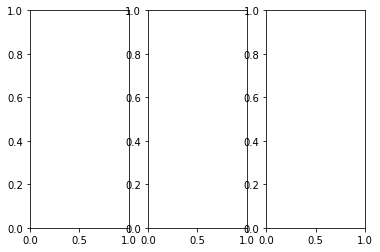

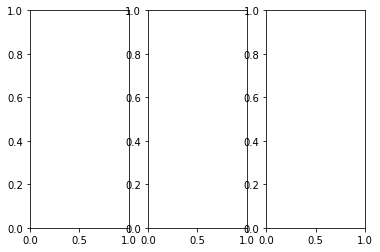

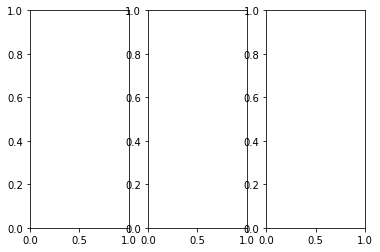

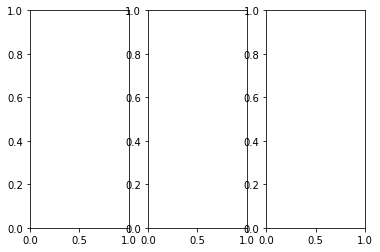

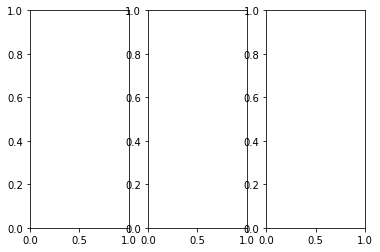

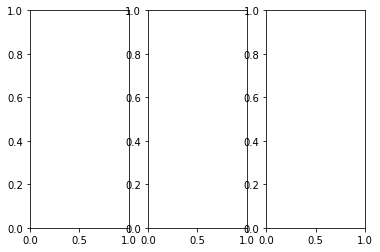

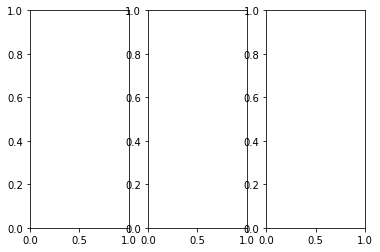

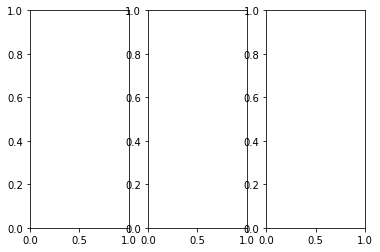

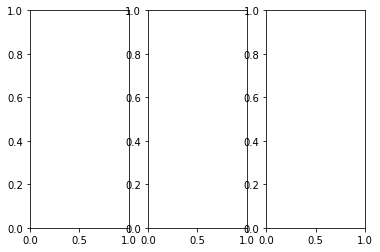

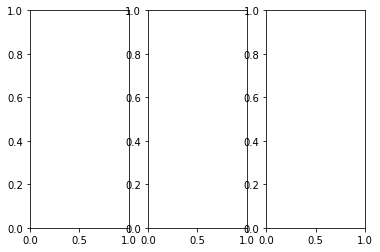

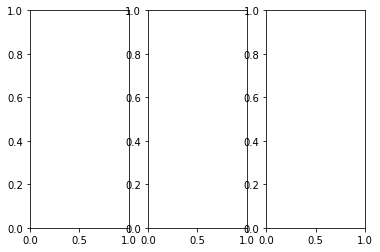

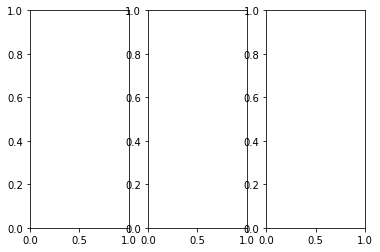

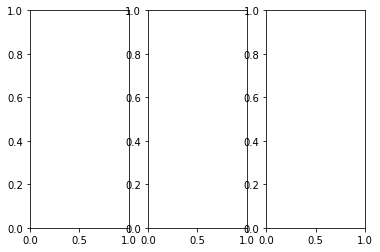

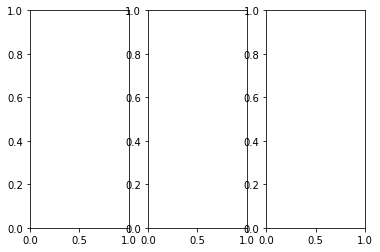

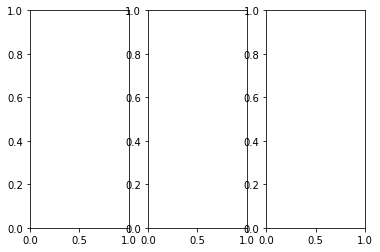

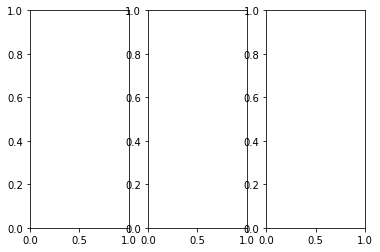

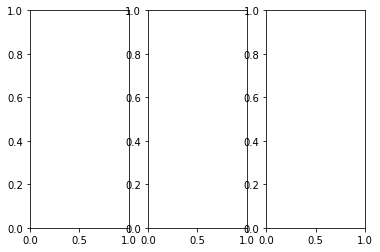

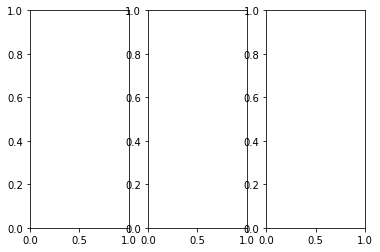

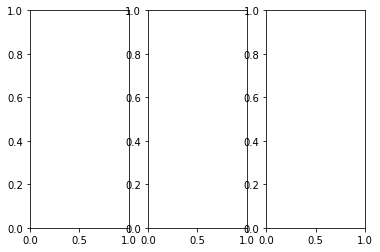

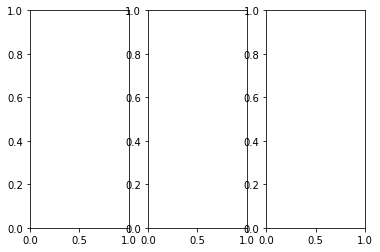

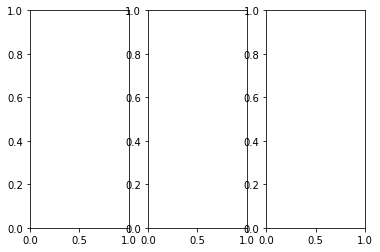

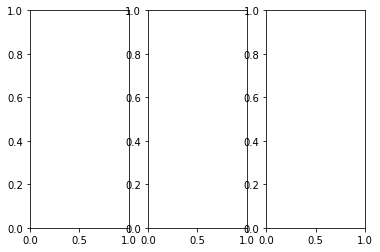

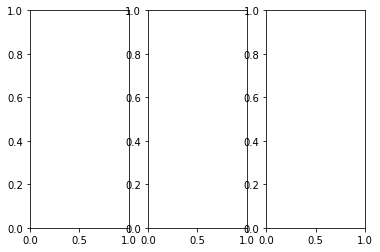

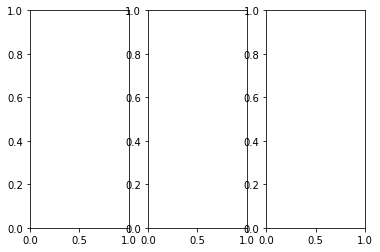

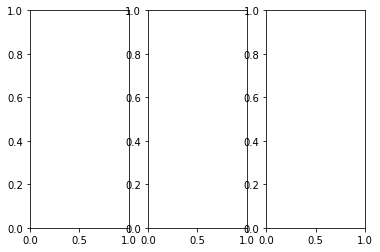

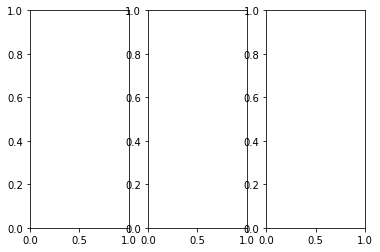

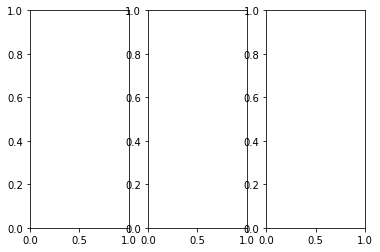

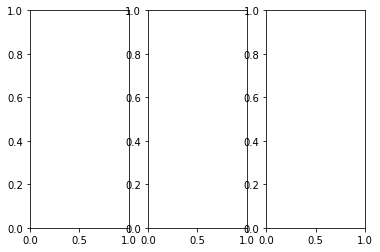

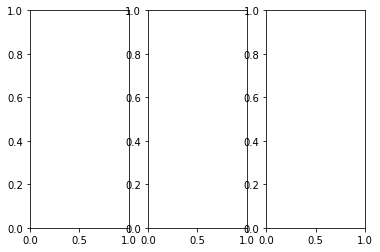

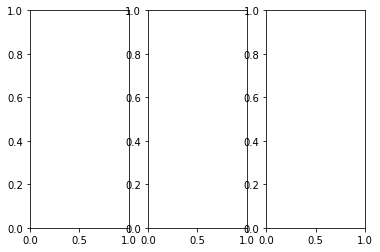

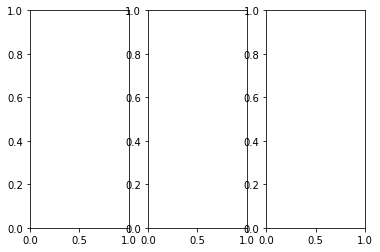

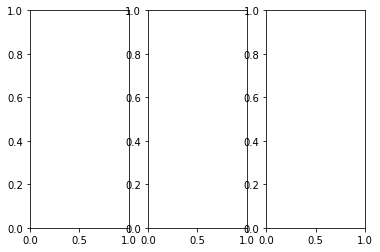

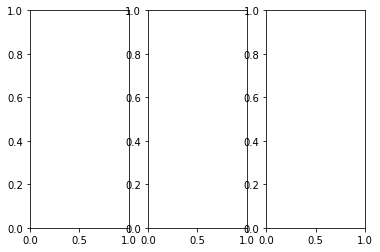

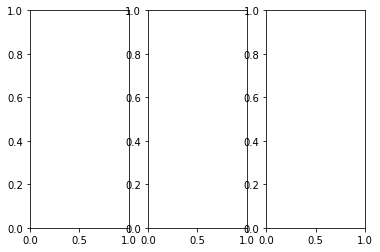

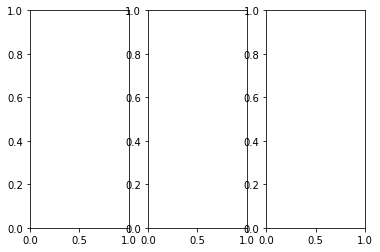

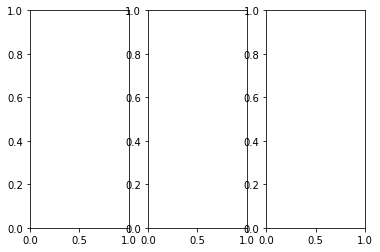

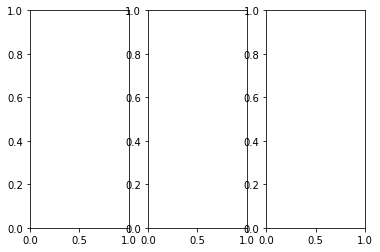

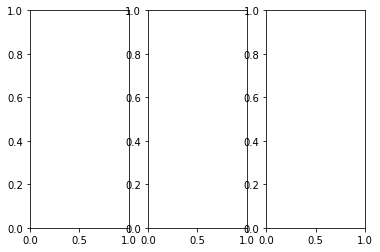

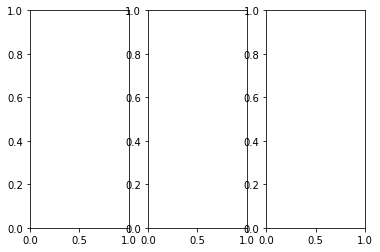

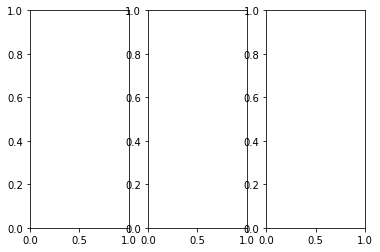

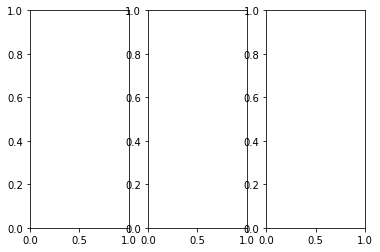

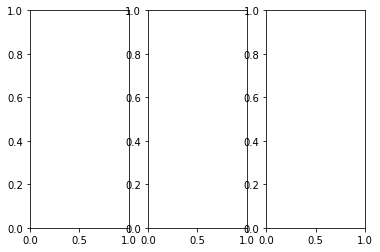

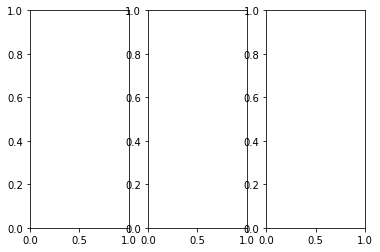

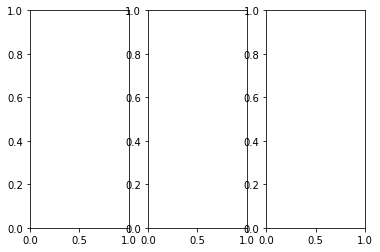

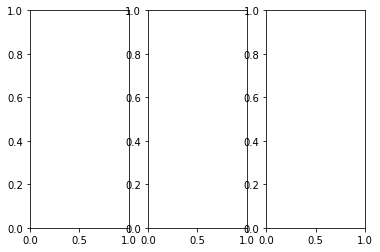

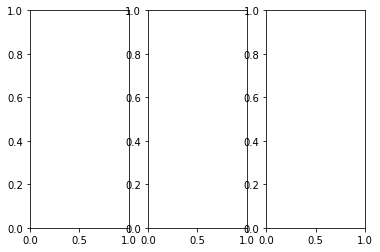

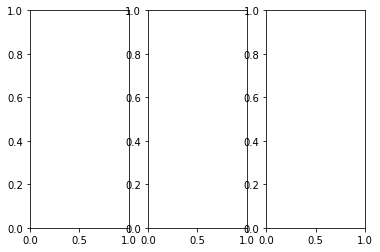

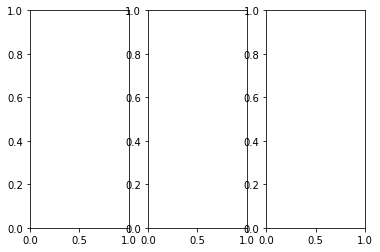

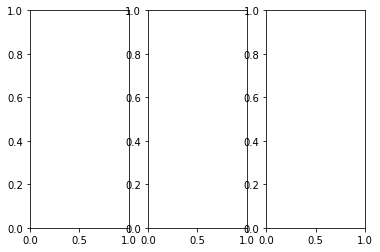

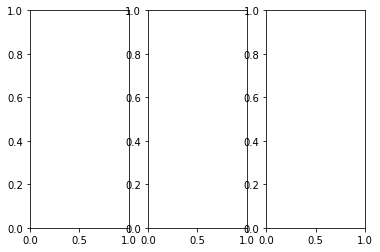

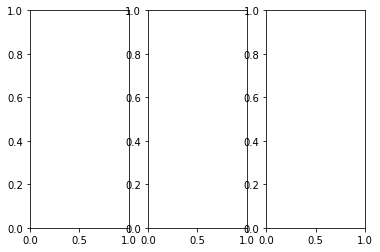

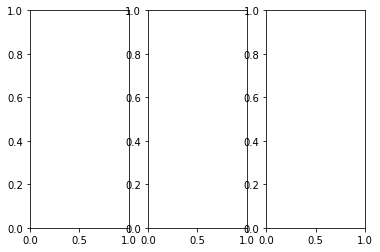

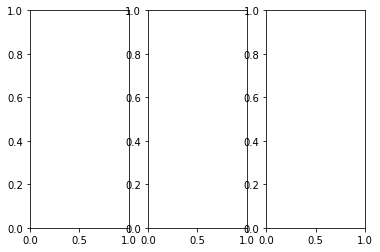

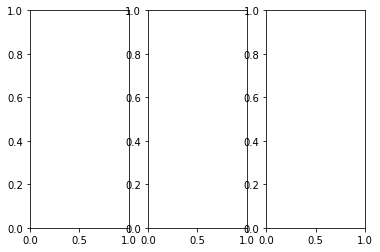

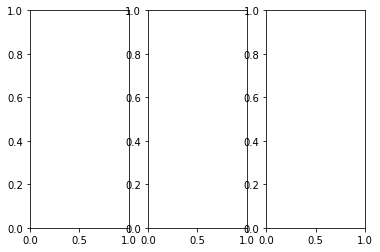

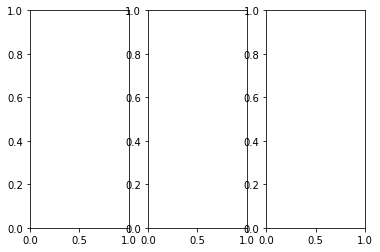

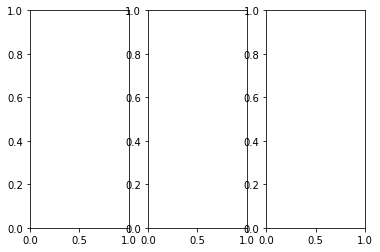

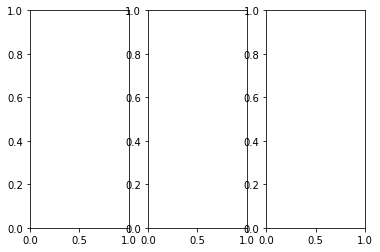

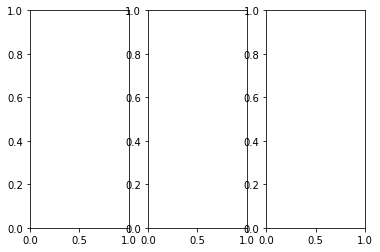

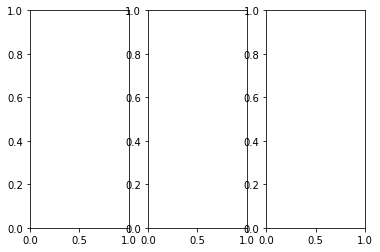

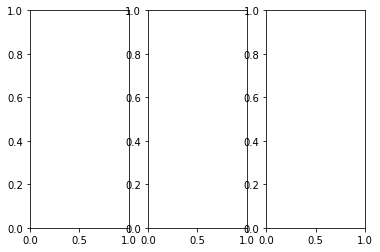

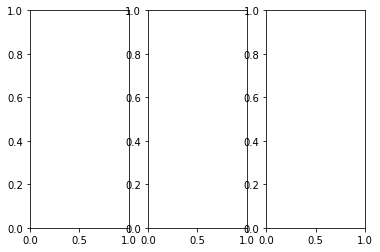

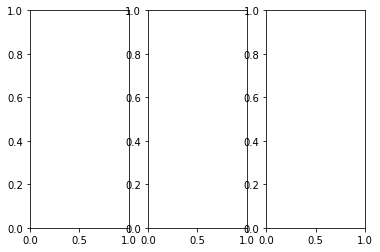

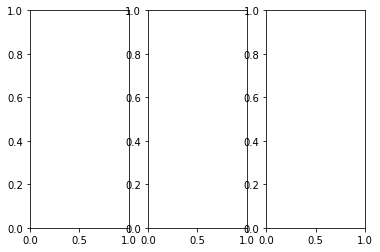

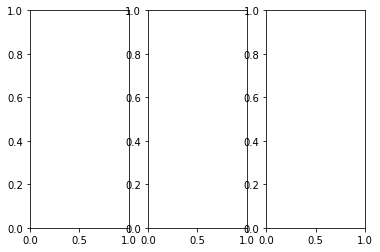

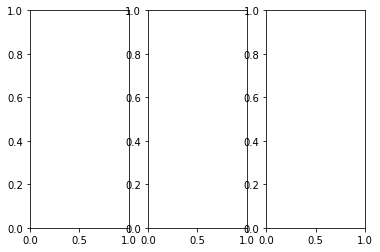

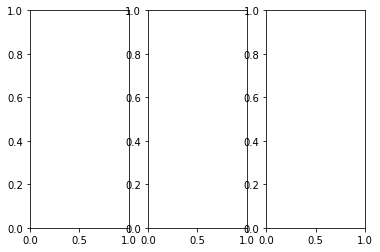

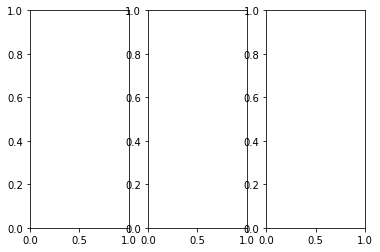

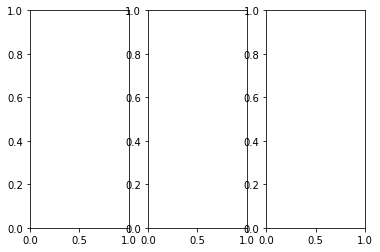

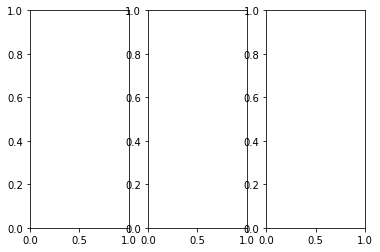

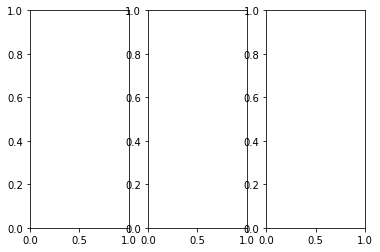

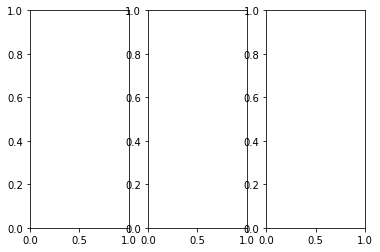

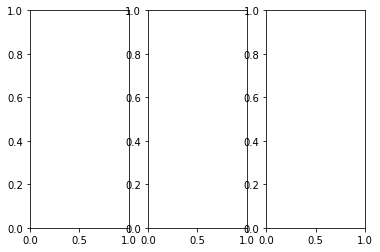

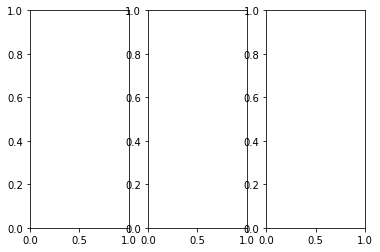

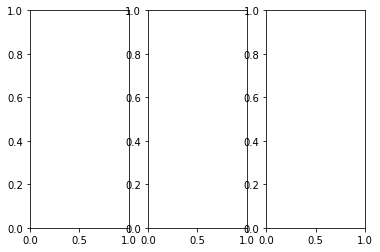

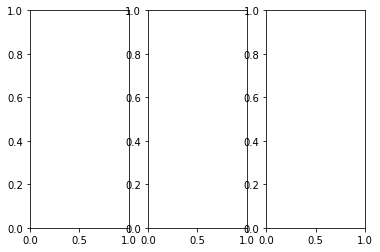

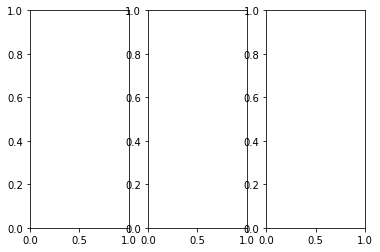

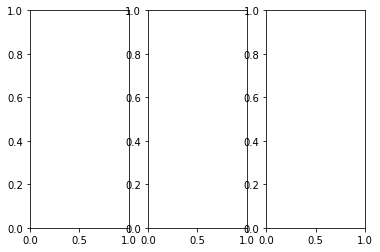

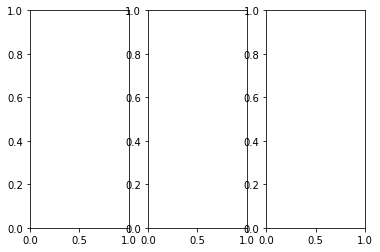

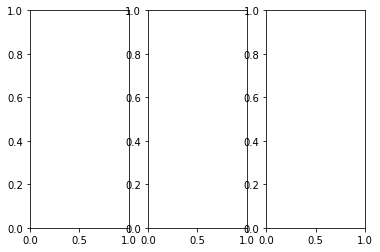

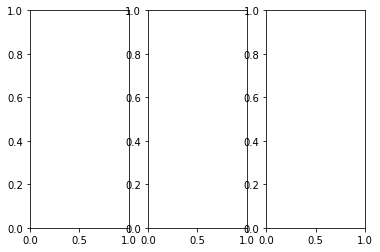

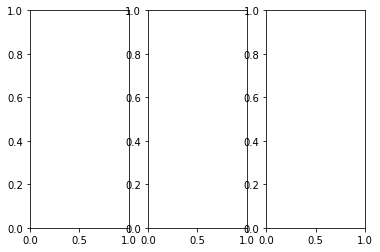

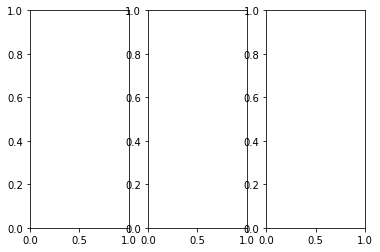

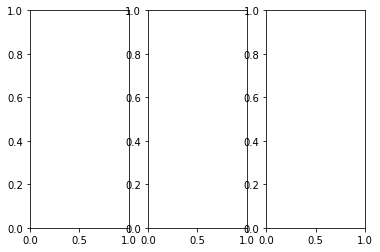

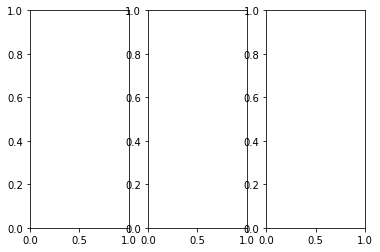

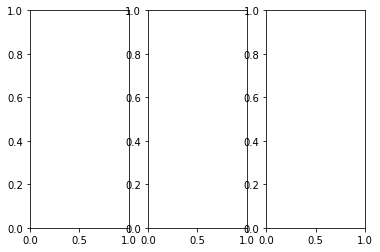

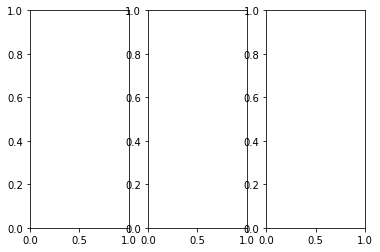

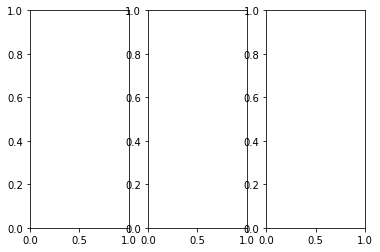

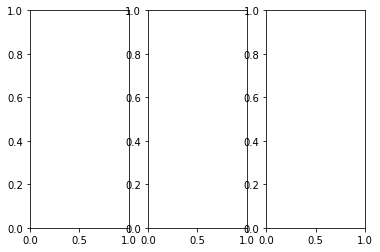

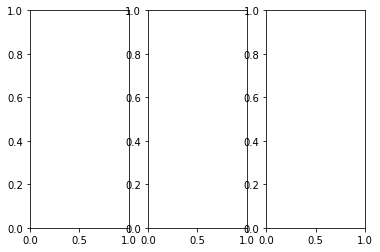

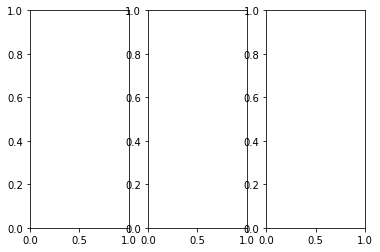

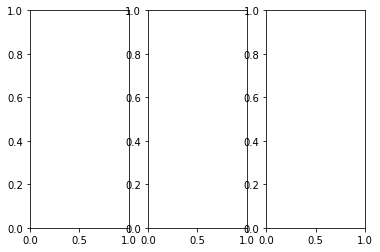

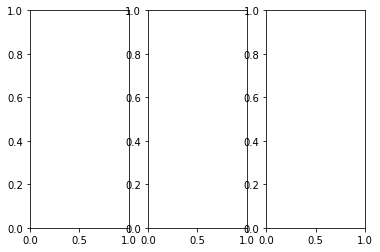

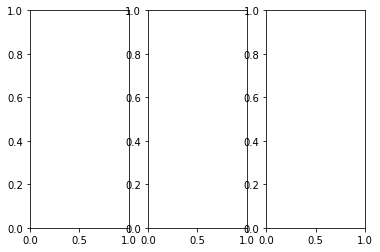

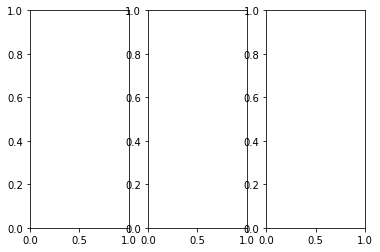

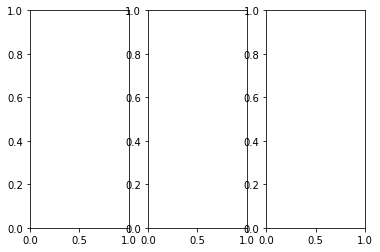

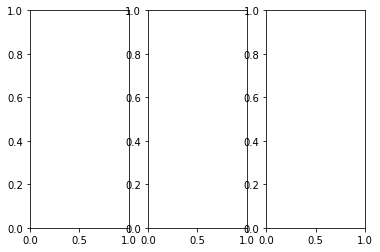

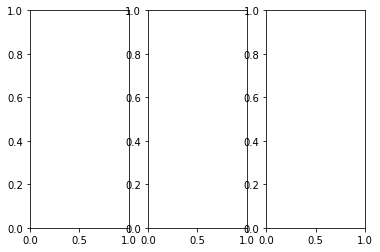

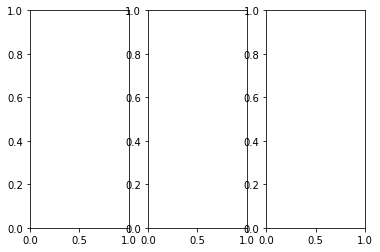

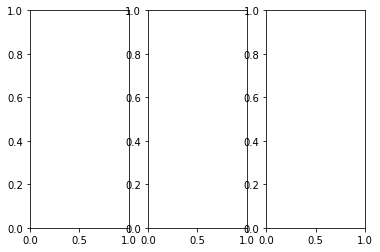

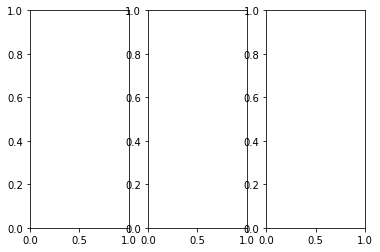

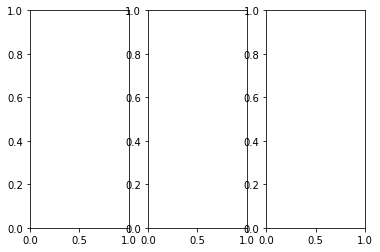

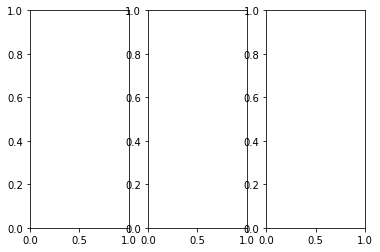

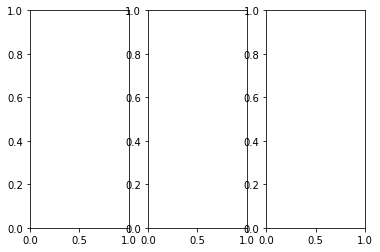

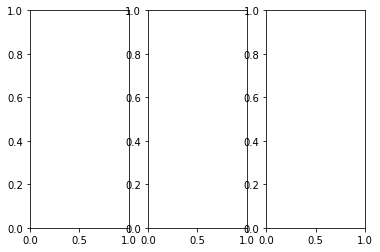

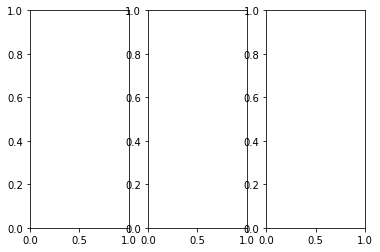

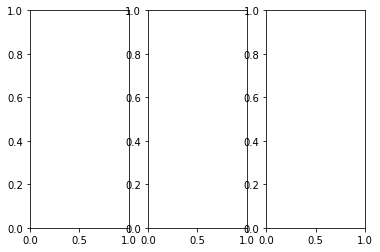

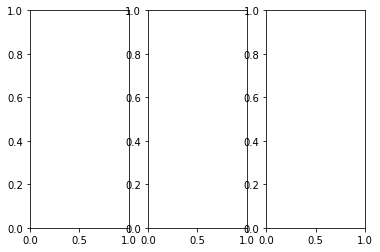

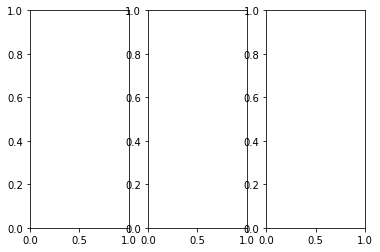

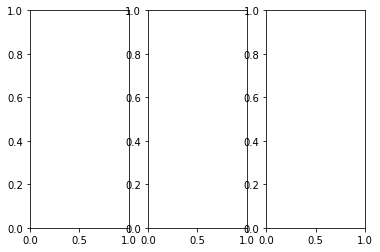

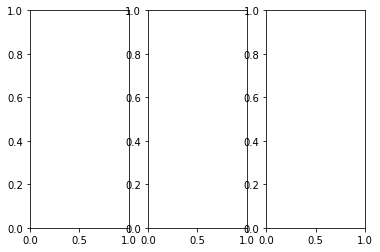

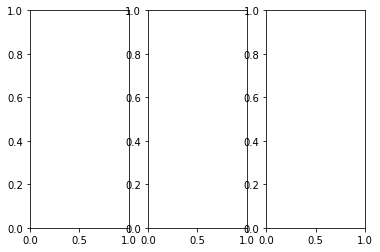

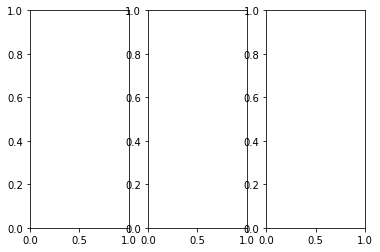

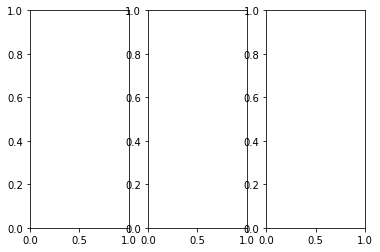

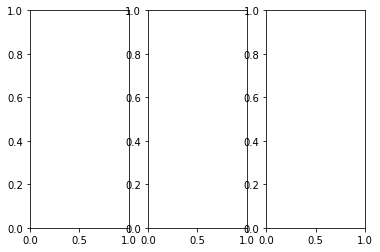

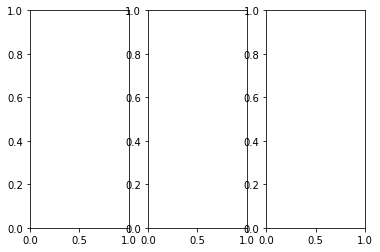

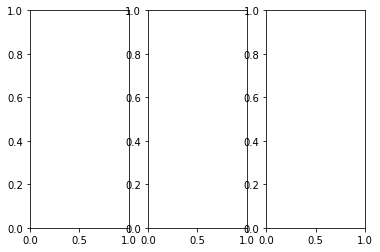

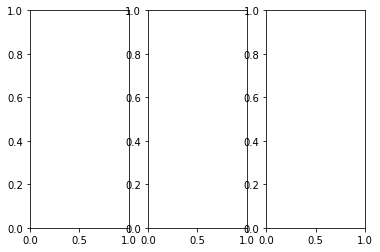

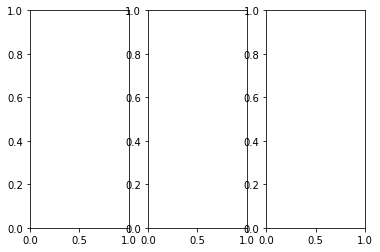

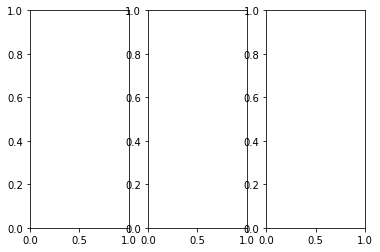

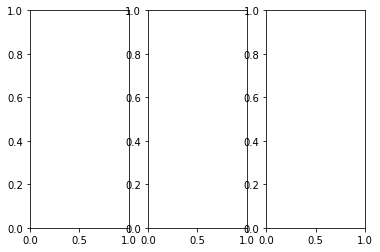

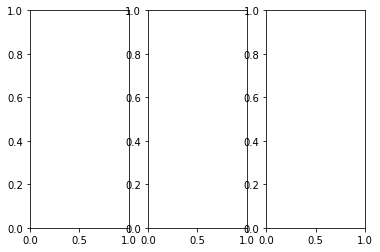

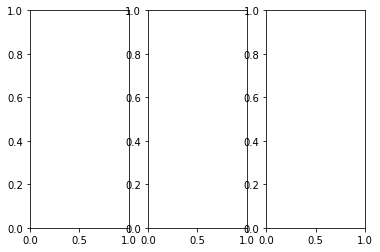

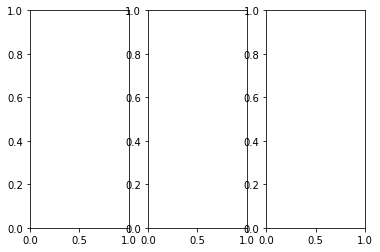

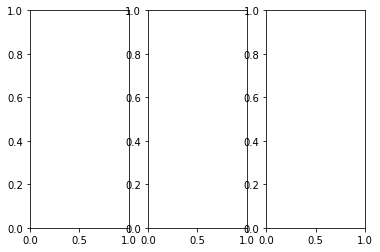

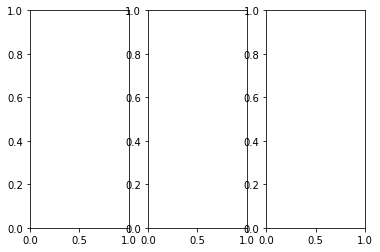

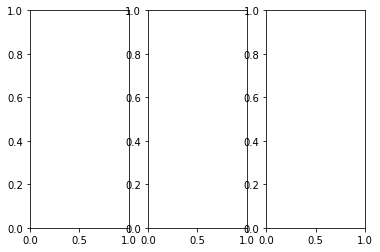

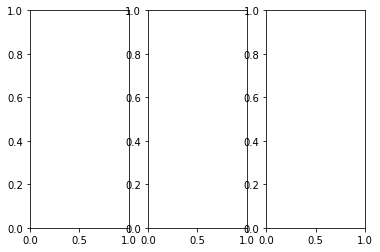

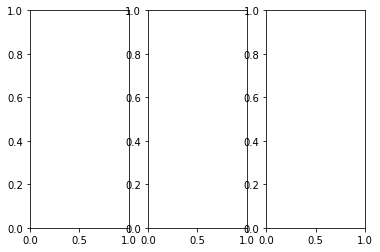

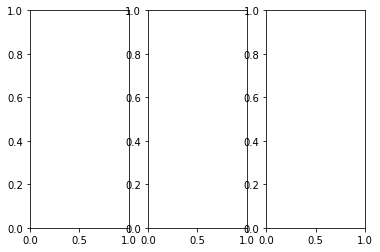

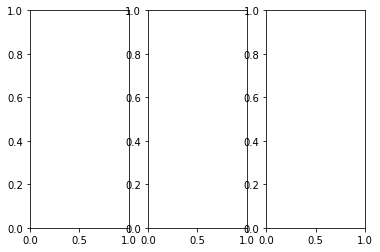

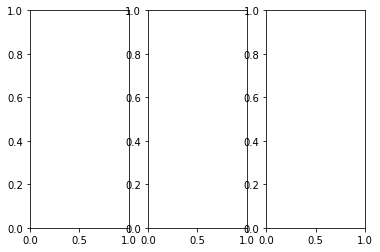

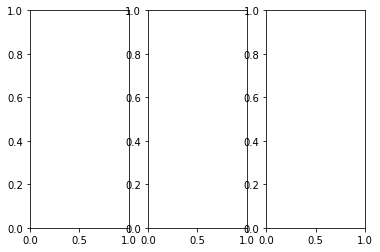

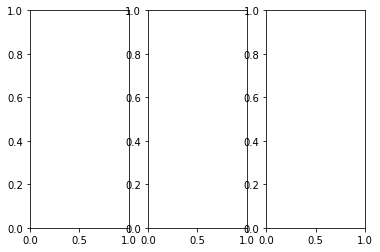

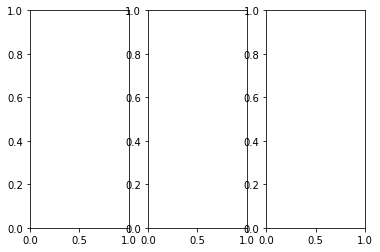

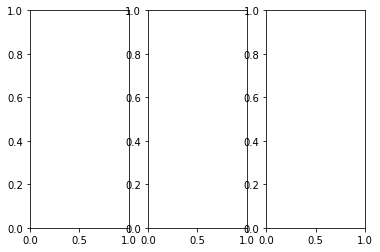

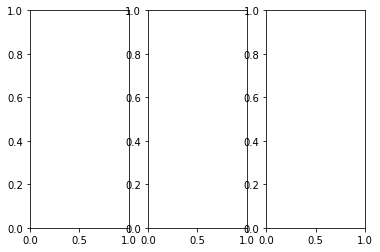

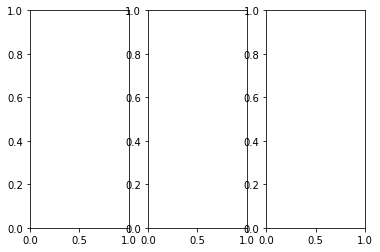

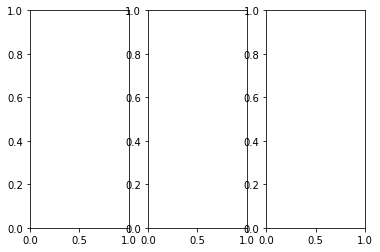

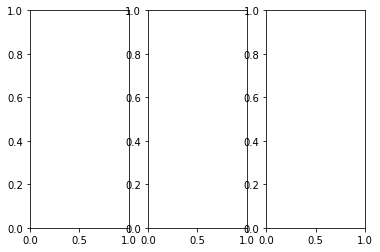

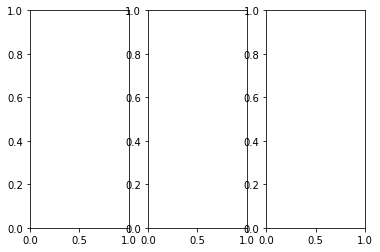

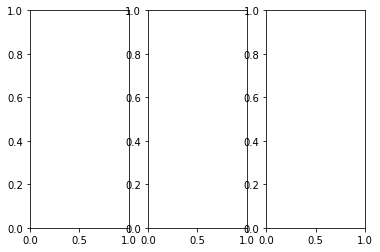

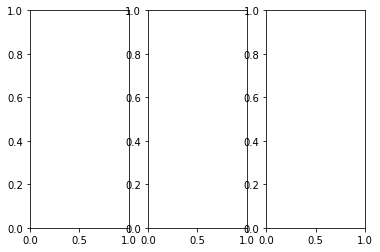

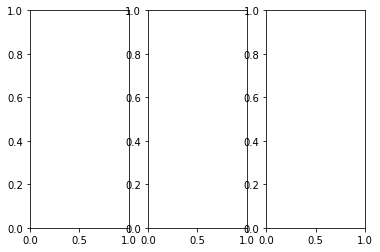

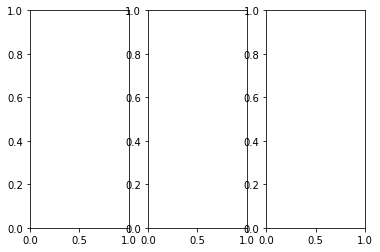

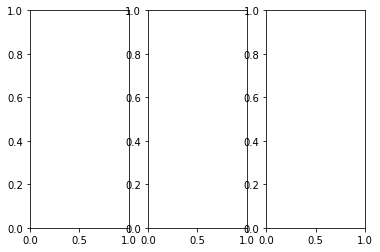

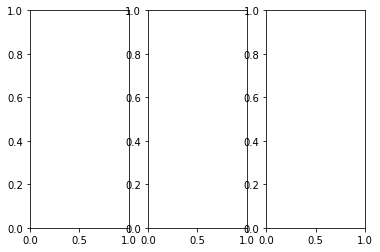

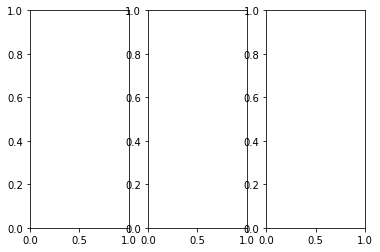

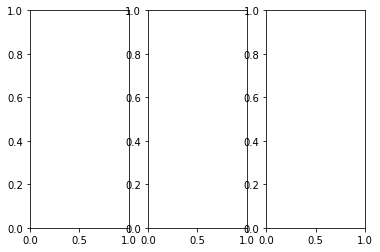

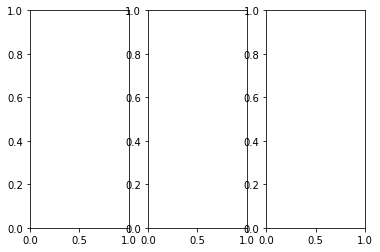

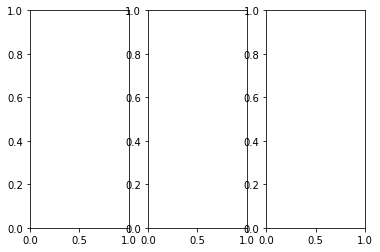

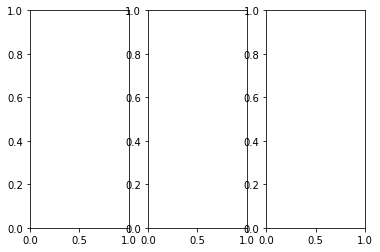

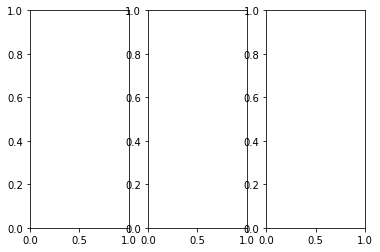

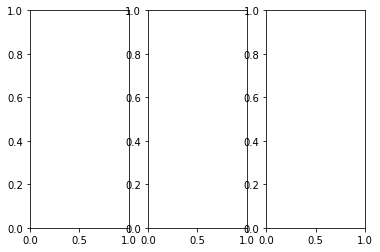

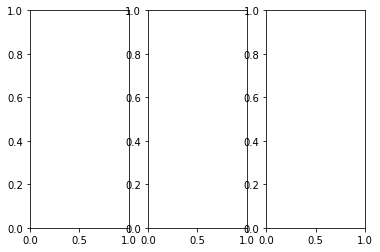

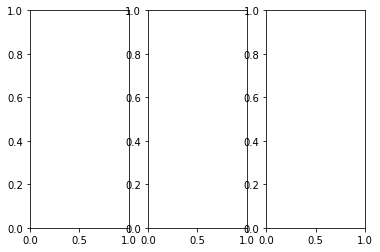

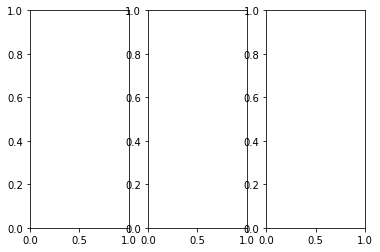

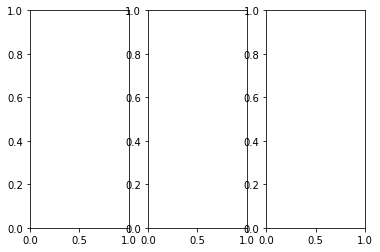

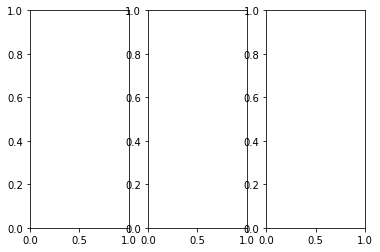

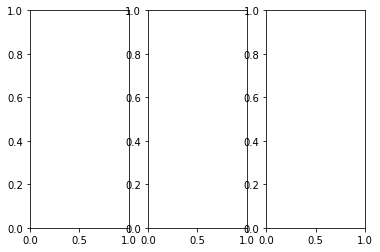

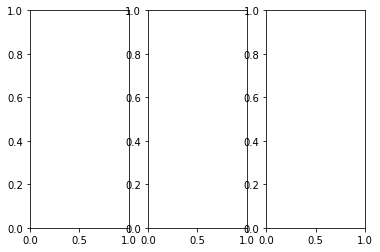

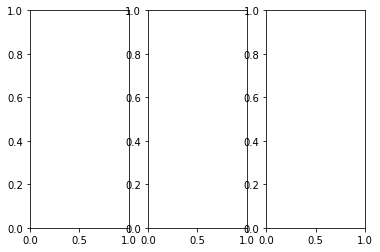

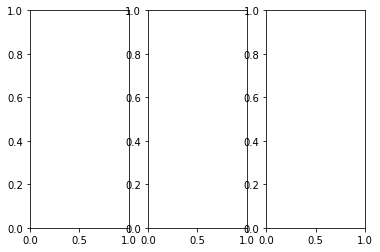

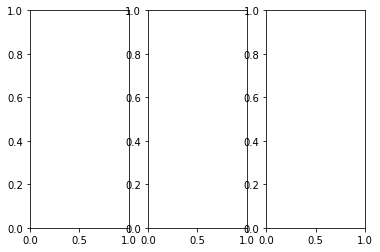

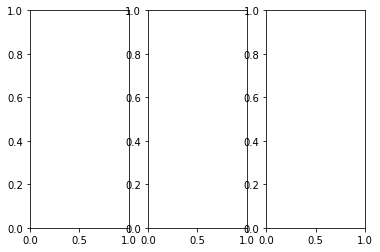

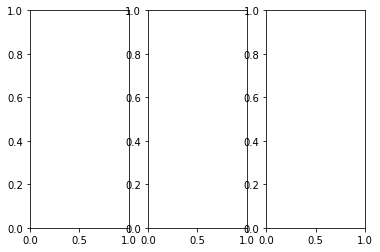

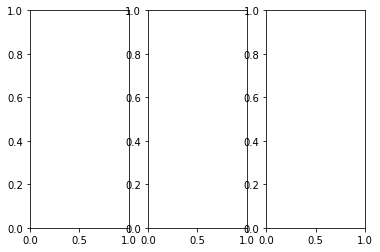

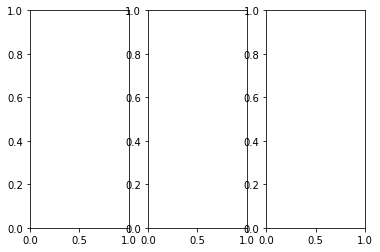

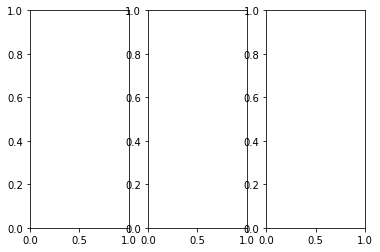

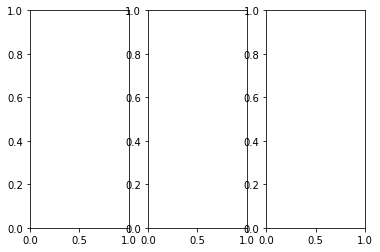

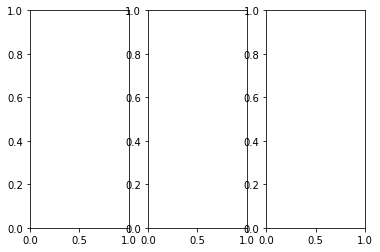

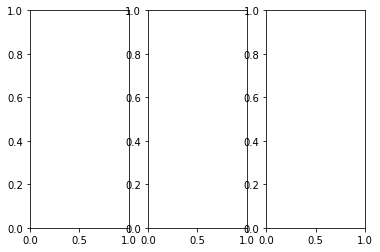

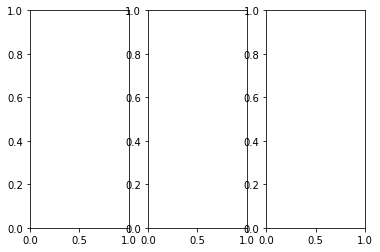

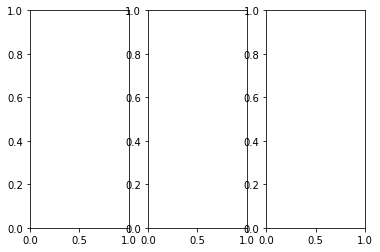

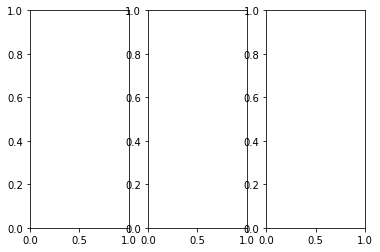

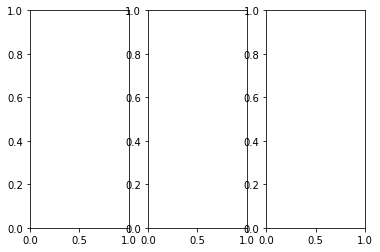

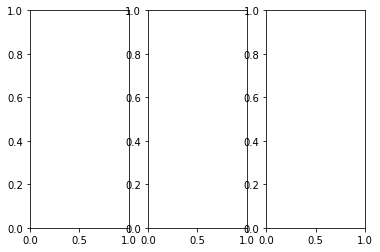

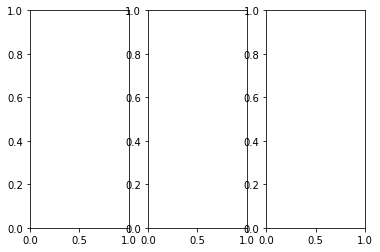

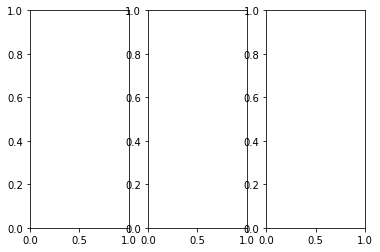

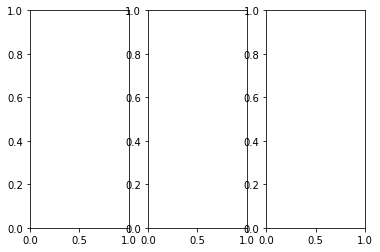

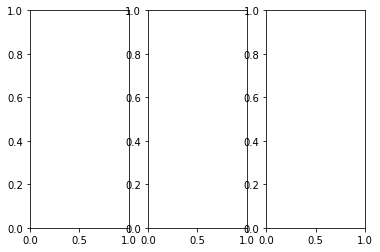

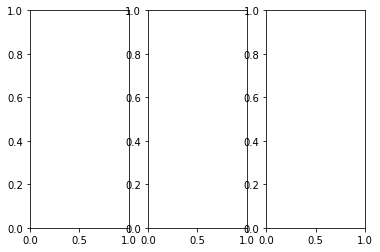

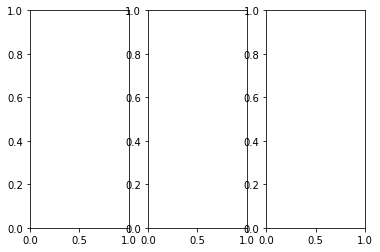

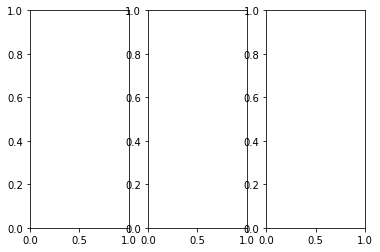

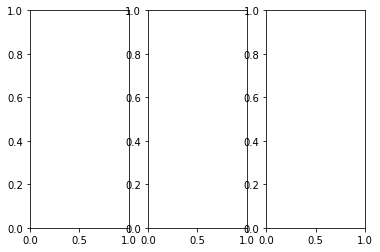

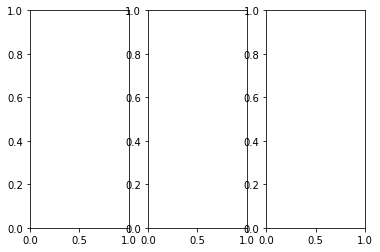

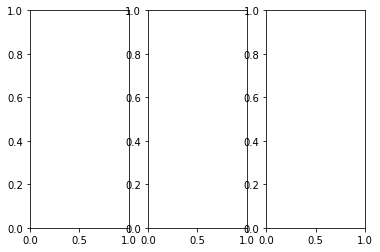

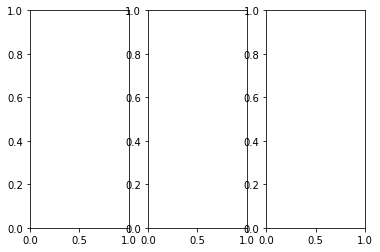

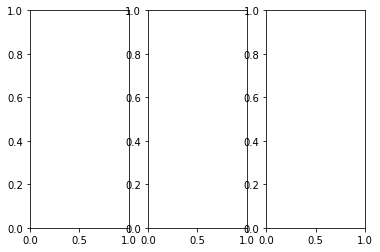

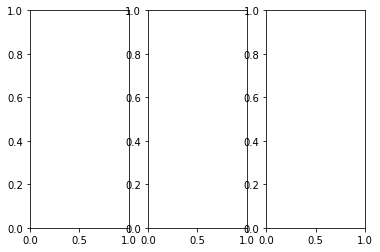

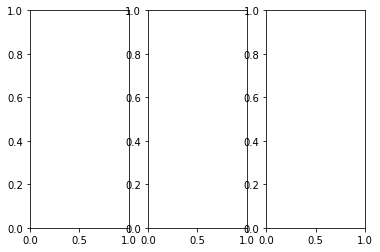

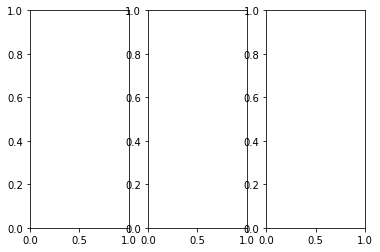

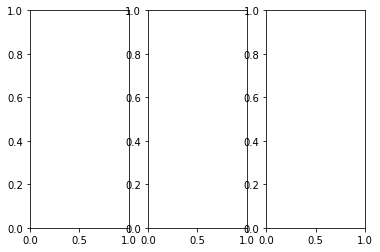

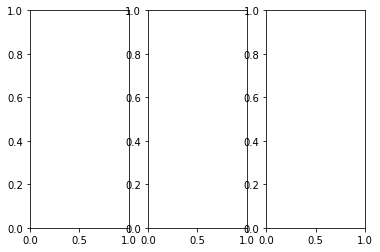

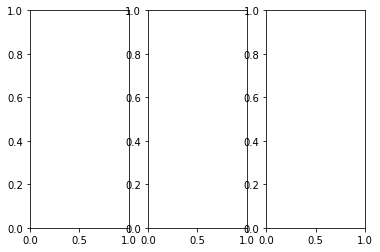

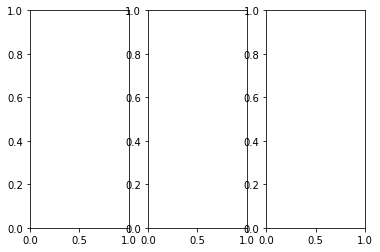

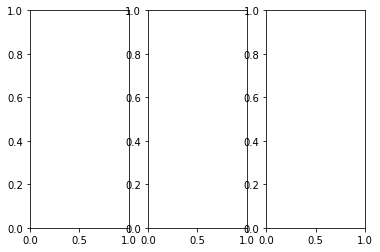

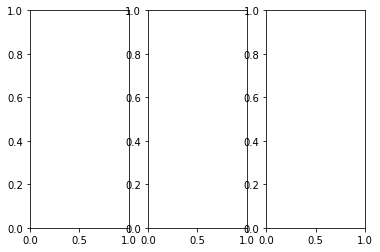

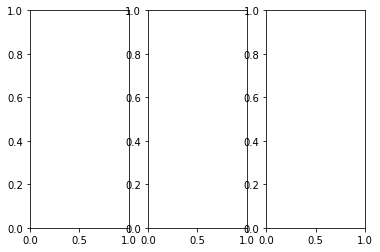

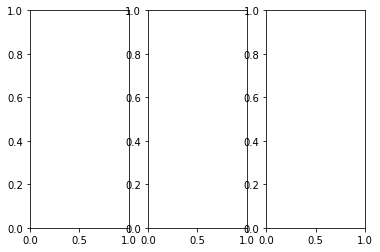

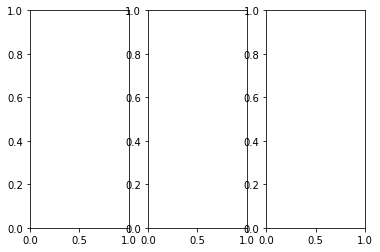

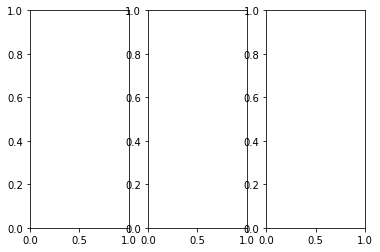

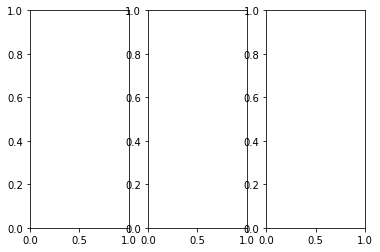

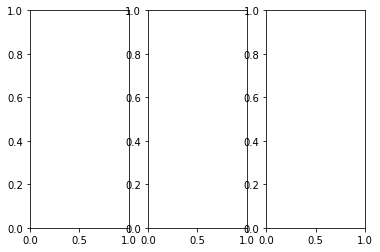

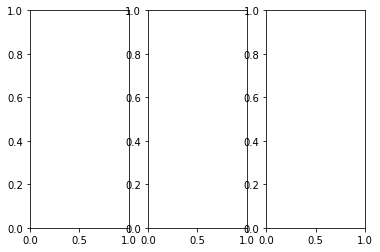

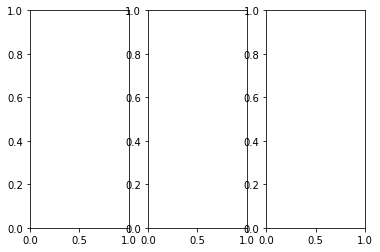

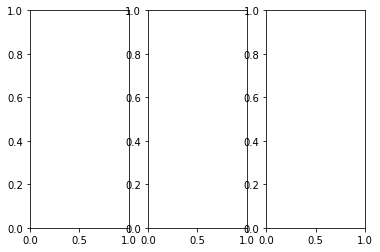

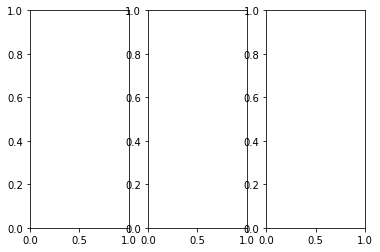

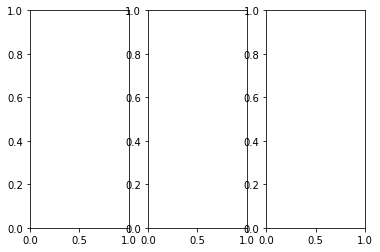

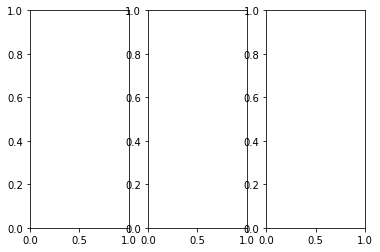

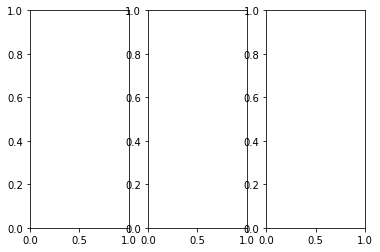

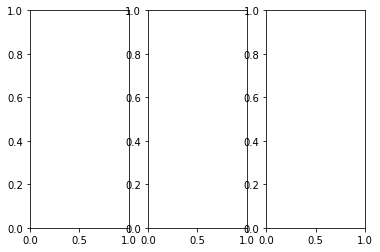

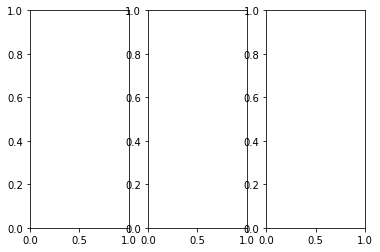

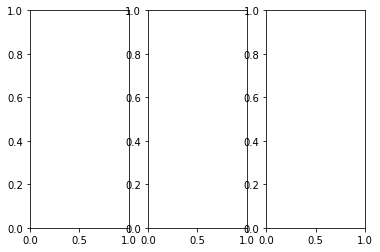

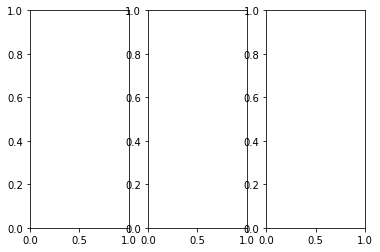

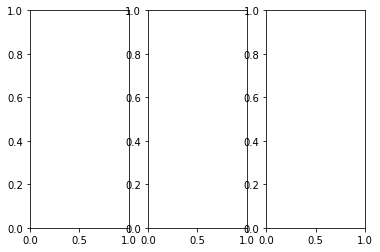

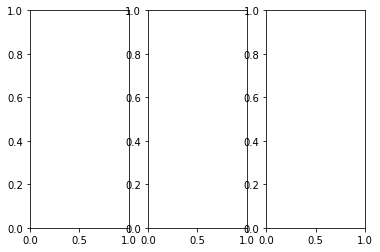

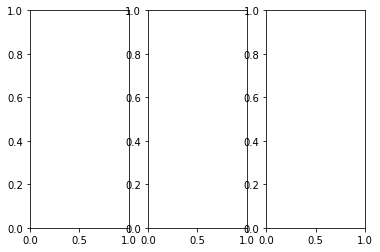

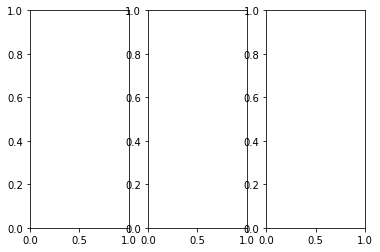

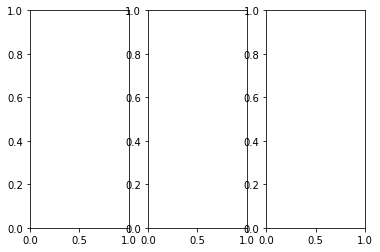

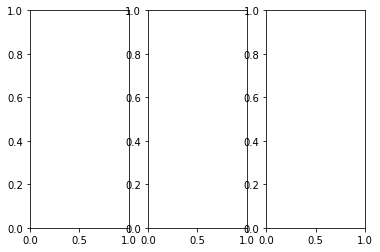

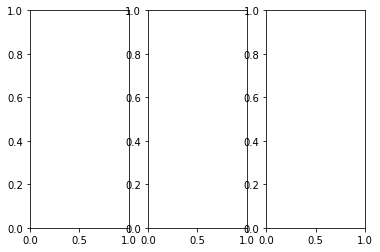

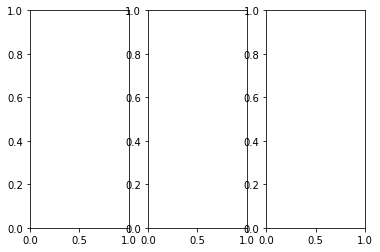

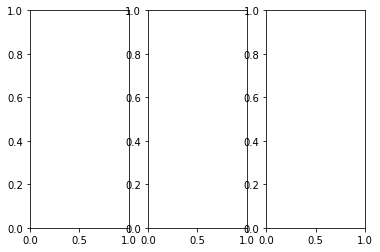

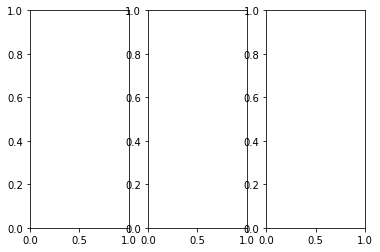

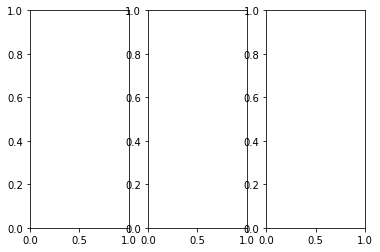

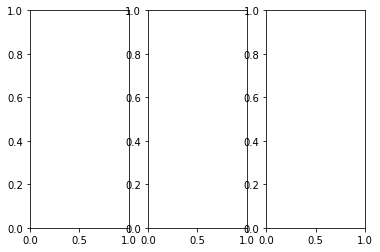

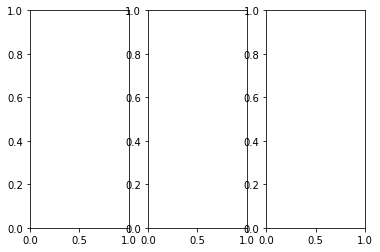

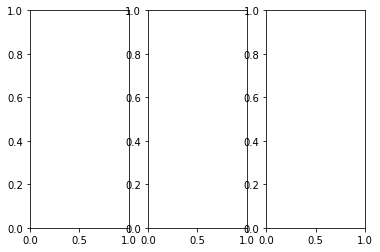

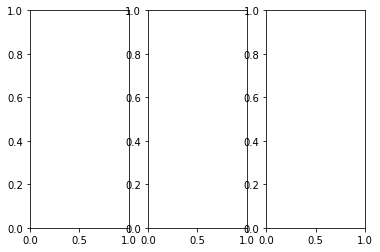

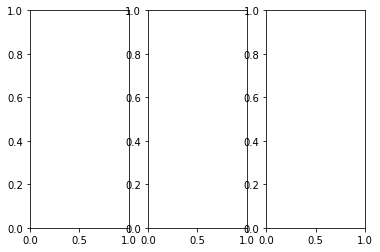

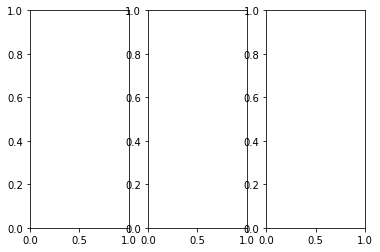

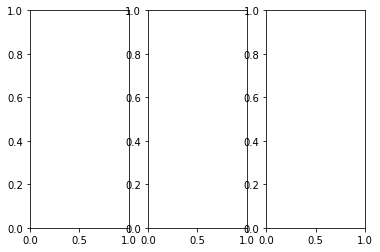

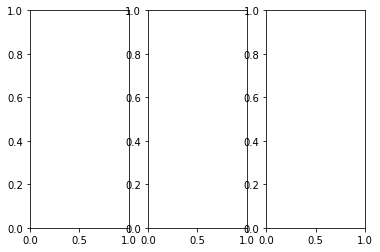

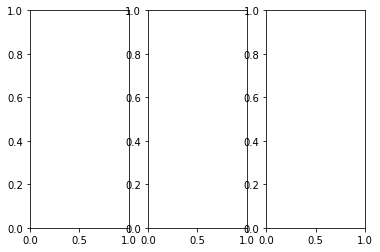

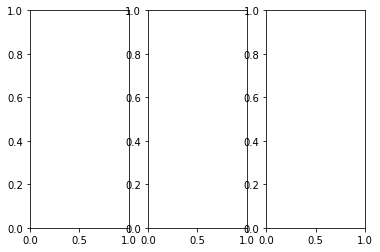

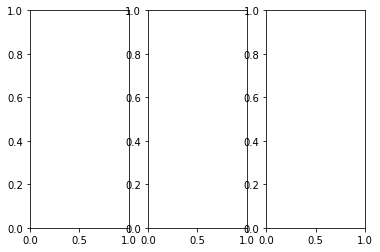

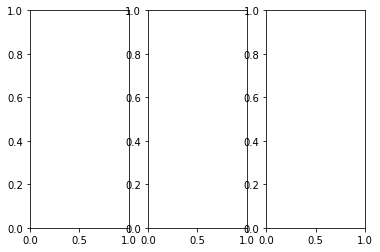

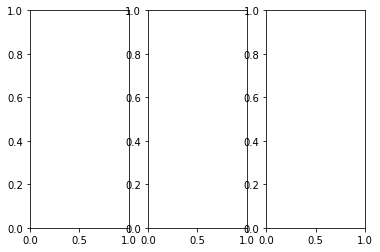

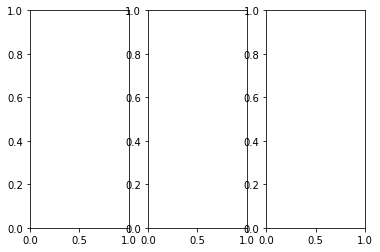

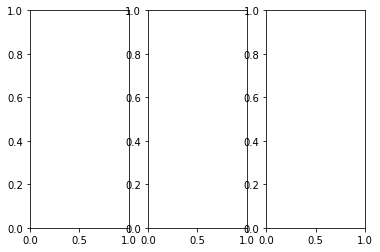

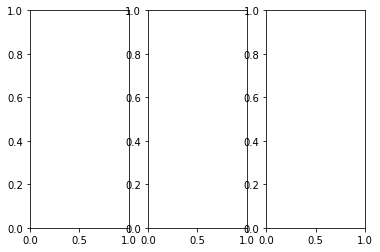

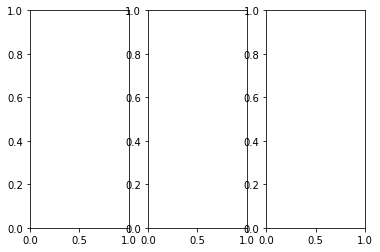

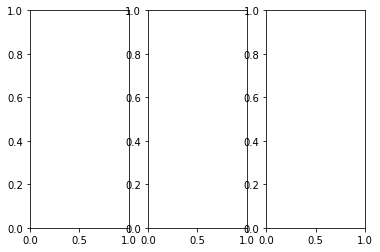

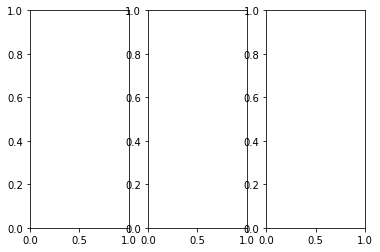

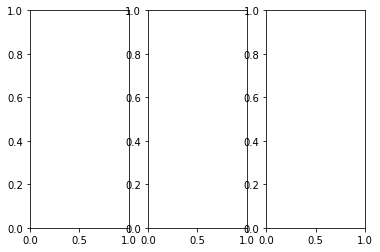

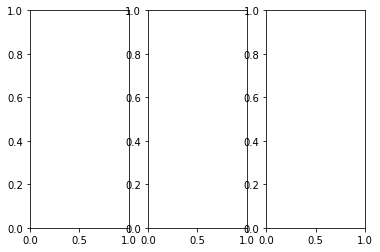

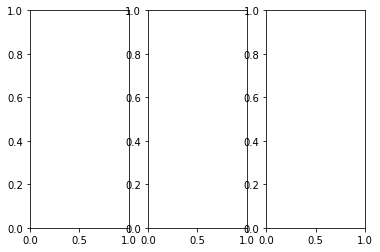

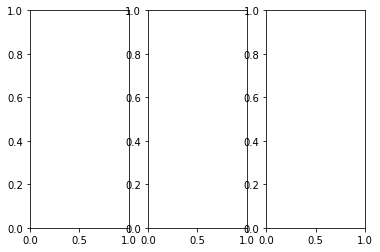

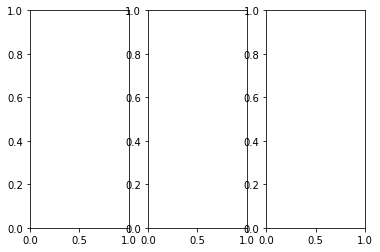

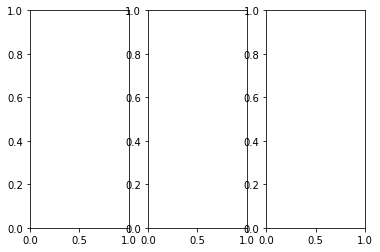

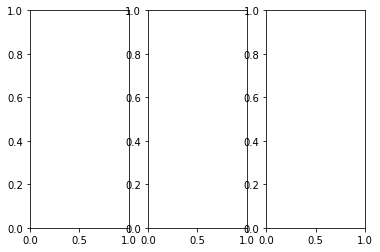

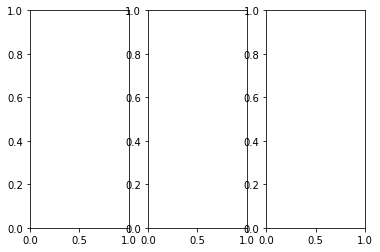

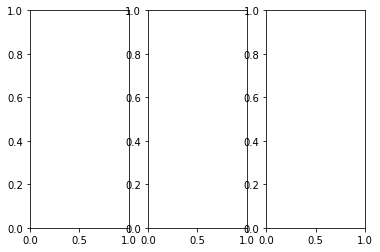

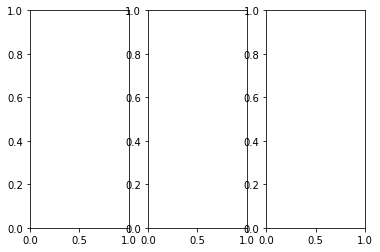

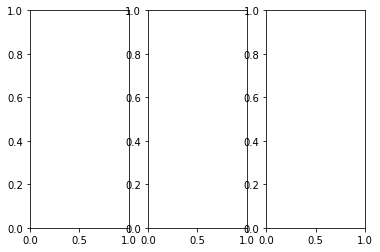

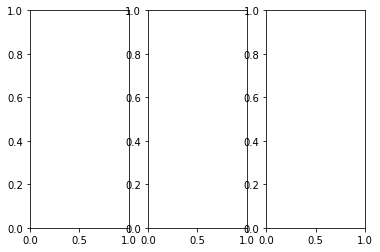

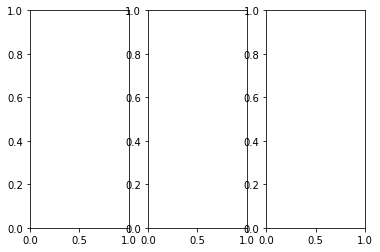

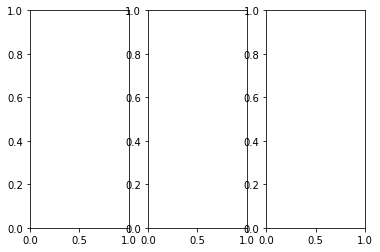

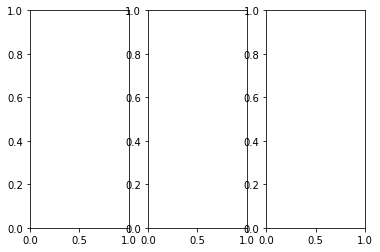

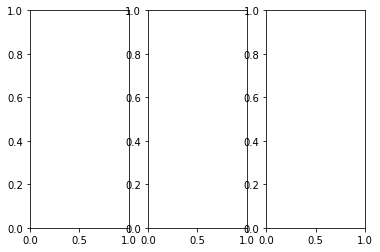

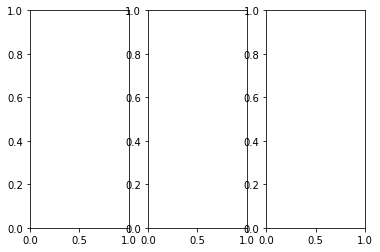

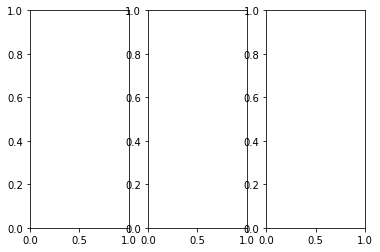

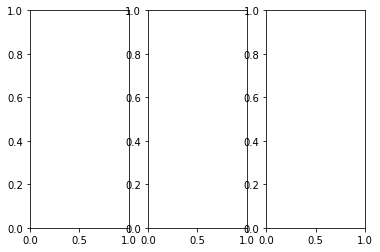

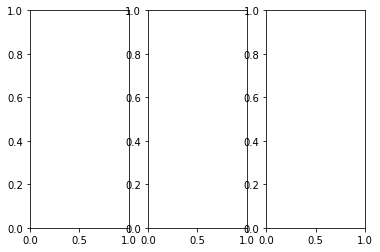

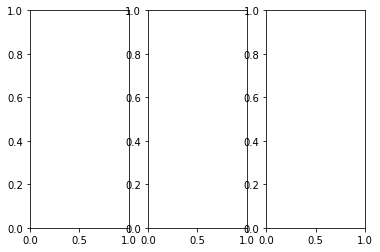

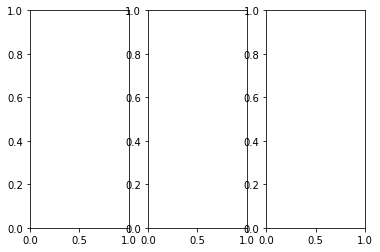

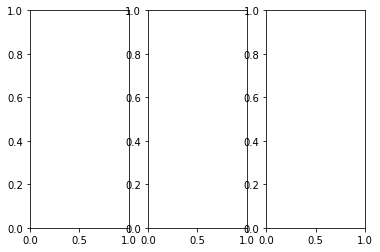

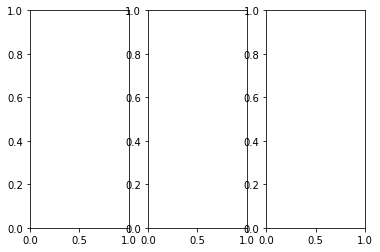

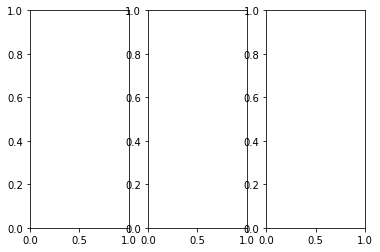

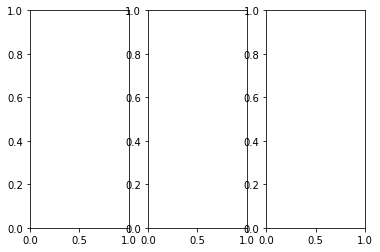

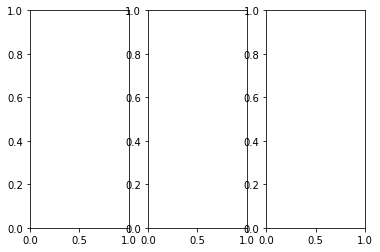

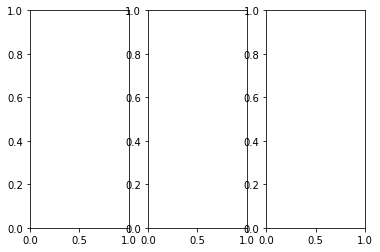

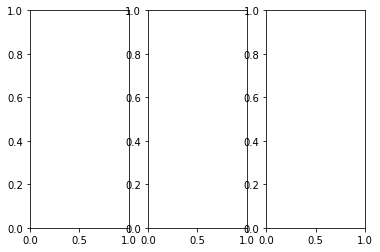

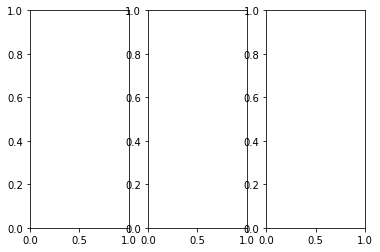

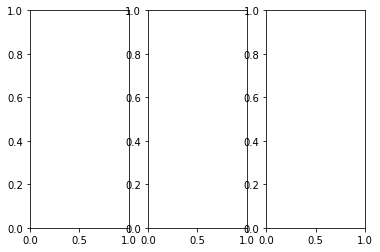

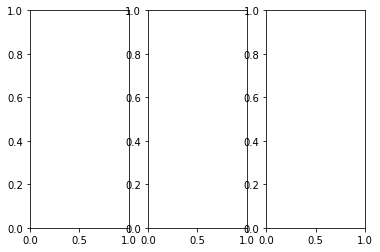

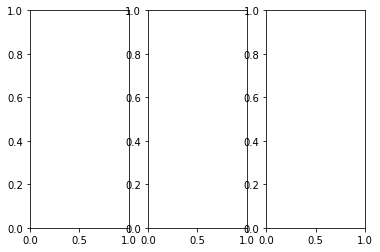

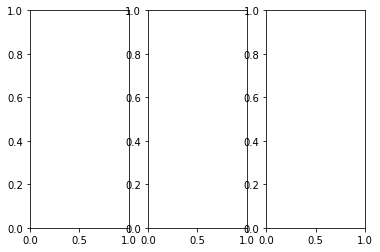

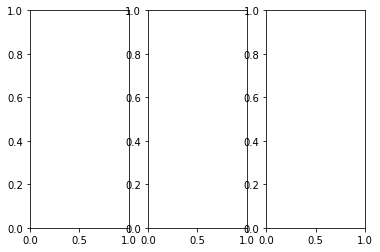

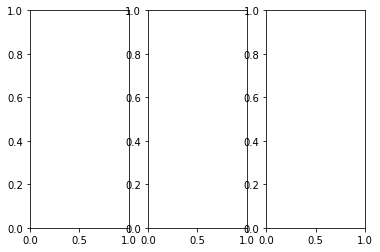

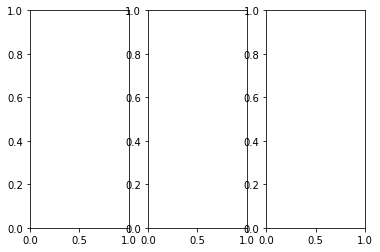

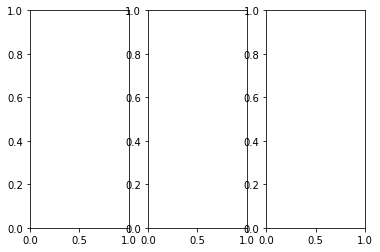

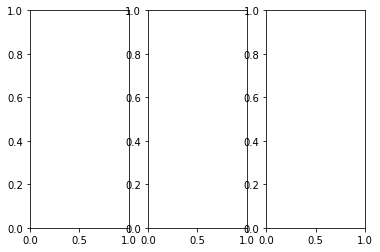

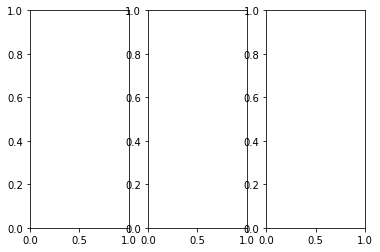

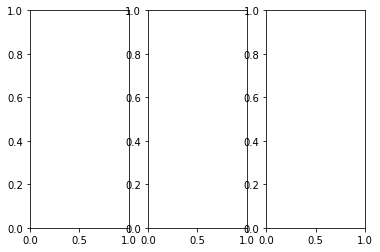

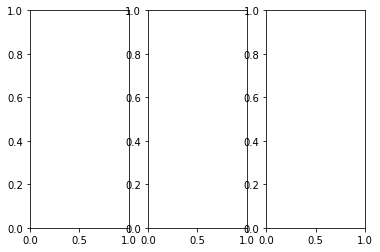

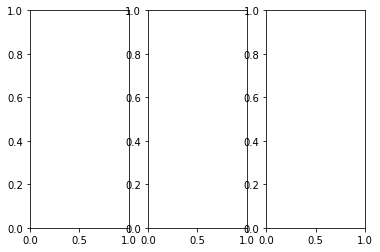

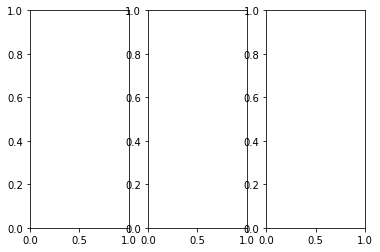

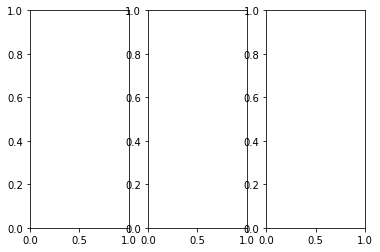

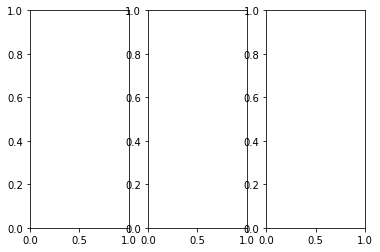

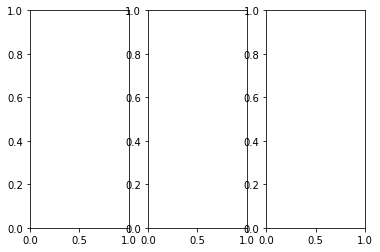

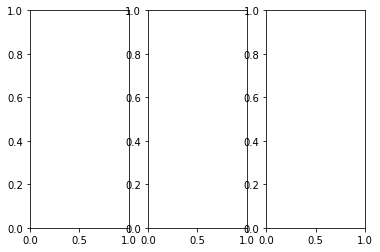

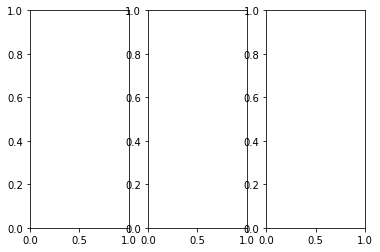

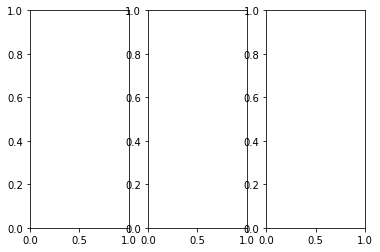

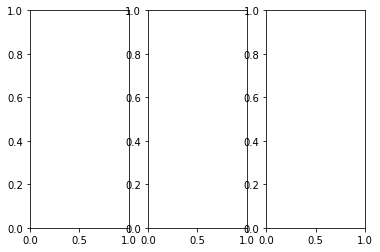

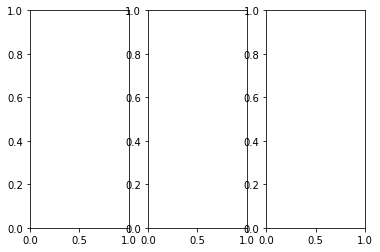

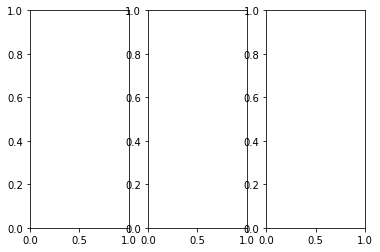

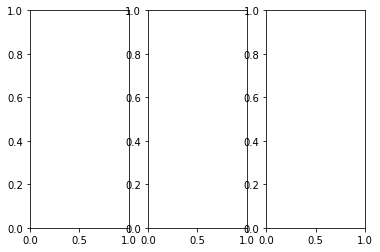

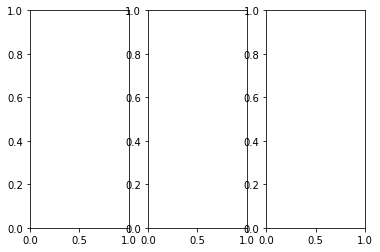

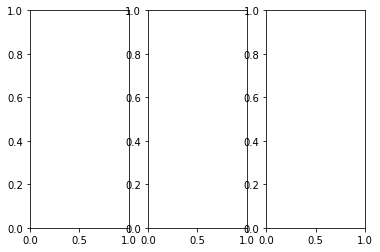

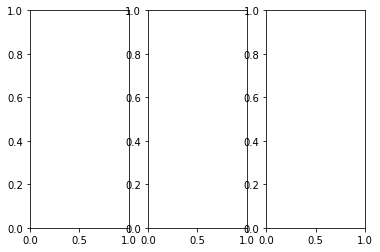

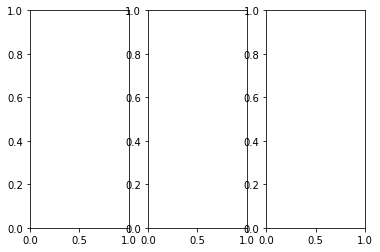

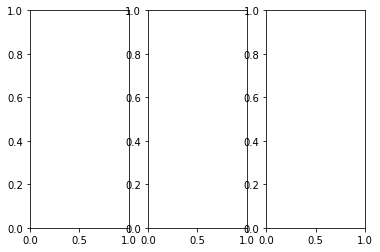

In [5]:
global_features = []
labels = []
bins=8
i, j = 0, 0
k = 0
train_labels = os.listdir(train_path)
for training_name in train_labels:
    # join the training data path and each species training folder
    img_list = os.listdir(train_path + '/' + training_name)
    print('TRAINING_NAME',training_name)
    current_label = training_name
    print('current_label',current_label)
    k = 1
#     print('k is outside loop',k)
    for img in img_list:
#         print('k is inside loop',k)
        image=train_path + '/' + training_name+'/' + img
        ip_img = cv2.imread(image,cv2.IMREAD_UNCHANGED)
        img_out = cv2.cvtColor(ip_img, cv2.COLOR_RGB2GRAY)#Converting to grayscale
        img_arr = np.array(img_out) #Converting to array
#         plt.imshow(img_arr)
        # Finding LBP
        feat_lbp = local_binary_pattern(img_arr,8,1,'uniform') #Radius = 1, No. of neighbours = 8
        feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255)
        # Energy and Entropy of LBP feature
        lbp_hist,_ = np.histogram(feat_lbp,8)
        lbp_hist = np.array(lbp_hist,dtype=float)
        lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
        lbp_energy = np.sum(lbp_prob**2)
        lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
#         print('LBP energy = '+str(lbp_energy))
#         print('LBP entropy = '+str(lbp_entropy))
        # Finding GLCM features from co-occurance matrix
        gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True) # Co-occurance matrix
        contrast = greycoprops(gCoMat, prop='contrast')
        dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
        homogeneity = greycoprops(gCoMat, prop='homogeneity')
        energy = greycoprops(gCoMat, prop='energy')
        correlation = greycoprops(gCoMat, prop='correlation')
        feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
#         print('Contrast = '+str(contrast[0][0]))
#         print('Dissimilarity = '+str(dissimilarity[0][0]))
#         print('Homogeneity = '+str(homogeneity[0][0]))
#         print('Energy = '+str(energy[0][0]))
#         print('Correlation = '+str(correlation[0][0]))
        # Gabor filter
        gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
        gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
        # Displaying the filter response
        fig, ax = plt.subplots(1,3)    
#         ax[0].imshow(gaborFilt_real,cmap='gray')
#         ax[1].imshow(gaborFilt_imag,cmap='gray')
#         ax[2].imshow(gaborFilt,cmap='gray')
        # Energy and Entropy of Gabor filter response
        gabor_hist,_ = np.histogram(gaborFilt,8)
        gabor_hist = np.array(gabor_hist,dtype=float)
        gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
        gabor_energy = np.sum(gabor_prob**2)
        gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
#         print('Gabor energy = '+str(gabor_energy))
#         print('Gabor entropy = '+str(gabor_entropy))
        
        global_feature = np.hstack(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]))
        labels.append(current_label)
        global_features.append(global_feature)   
        i += 1
        k += 1
    print( "[STATUS] processed folder: {}".format(current_label))
    print('GLOBAL FEATURE SHAPE',np.array(global_features).shape)
    j += 1
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

In [6]:
np.array(global_features).shape

(484, 9)

In [7]:
np.array(labels).shape

(484,)

In [8]:

print ("[STATUS] completed Global Feature Extraction...")
# get the overall feature vector size
print ("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

[STATUS] completed Global Feature Extraction...
[STATUS] feature vector size (484, 9)
[STATUS] training Labels (484,)


In [9]:
global_features=np.array(global_features).reshape(-1,9)

In [10]:
# encode the target labels
targetNames = np.unique(labels)
print(targetNames)

['early_blight' 'healthy' 'late_blight']


In [11]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# # encode the target labels
# targetNames = np.unique(labels)
# print(labels)
le = LabelEncoder()
print('Label',le)
target = le.fit_transform(labels)
print(target)
print ("[STATUS] training labels encoded...",np.array(labels).shape)

Label LabelEncoder()
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2

In [12]:
target.shape

(484,)

In [13]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
rescaled_features

array([[0.06567395, 0.9083272 , 0.38362367, ..., 0.76493572, 0.05853574,
        0.91732607],
       [0.18617159, 0.73412246, 0.38162712, ..., 0.63502991, 0.07836113,
        0.88980815],
       [0.08966138, 0.874202  , 0.24359614, ..., 0.78825041, 0.08168757,
        0.85488475],
       ...,
       [0.01910633, 0.96628927, 0.01336319, ..., 0.87908599, 0.32309112,
        0.49603227],
       [0.01699501, 0.97615296, 0.03907166, ..., 0.76784927, 0.19137103,
        0.64990685],
       [0.05403288, 0.92453717, 0.08665975, ..., 0.46968693, 0.17858041,
        0.69745034]])

In [14]:
rescaled_features.shape

(484, 9)

In [15]:
print ("[STATUS] feature vector normalized...")

print ("[STATUS] target labels: {}".format(target))
print ("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [16]:
# save the feature vector using HDF5
h5f_data = h5py.File('d:/output/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('d:/output/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()
print ("[STATUS] end of training..")

[STATUS] end of training..


In [17]:
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

In [18]:
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('D:/output/data.h5', 'r')
h5f_label = h5py.File('D:/output/labels.h5', 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(global_features.shape))
print ("[STATUS] labels shape: {}".format(global_labels.shape))

print ("[STATUS] training started...")

[STATUS] features shape: (484, 9)
[STATUS] labels shape: (484,)
[STATUS] training started...


In [19]:
# train_test_split size
test_size = 0.10
# seed for reproducing same results
seed = 9
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(trainDataGlobal.shape))
print ("Test data   : {}".format(testDataGlobal.shape))
print ("Train labels: {}".format(trainLabelsGlobal.shape))
print ("Test labels : {}".format(testLabelsGlobal.shape))
print(testLabelsGlobal.size)
print(trainDataGlobal.size)

[STATUS] splitted train and test data...
Train data  : (435, 9)
Test data   : (49, 9)
Train labels: (435,)
Test labels : (49,)
49
3915


LR: 0.735632 (0.006502)
LDA: 0.795402 (0.048549)
KNN: 0.827586 (0.014898)
CART: 0.777011 (0.022757)
RF: 0.813793 (0.009753)
NB: 0.708046 (0.042637)
SVM: 0.664368 (0.053222)


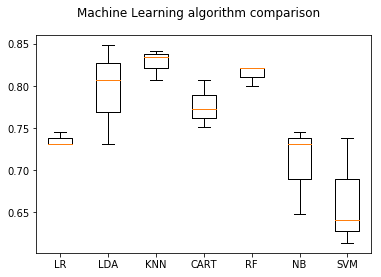

In [20]:
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=3, random_state=7)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [21]:
import matplotlib.pyplot as plt

# create the model - Random Forests
clf  = LogisticRegression(random_state=9)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Gabor energy = 0.2940940195694566
Gabor entropy = 2.0697896025953915
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(1,)
Gabor energy = 0.3271480961702764
Gabor entropy = 1.798207095108692
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(2,)
Gabor energy = 0.2697068019770086
Gabor entropy = 2.1011354872991728
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(3,)
Gabor energy = 0.16245486307889223
Gabor entropy = 2.8199990690365553
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(4,)
Gabor energy = 0.4155433257110417
Gabor entropy = 1.6129488250356596
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(5,)
Gabor energy = 0.33983795111998916
Gabor entropy = 1.8900771703417285
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(6,)
Gabor energy = 0.22661267407238483
Gabor entropy = 2.37550571565223
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(7,)
Gabor energy = 0.2482645083218813
Gabor entropy = 2.2330652613796813
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(8,)
Gabor energy = 0.38469360768795013
Gabor entropy

Gabor energy = 0.34345918241888285
Gabor entropy = 1.918882810545394
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(72,)
Gabor energy = 0.2648317446000874
Gabor entropy = 2.1836689803511264
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(73,)
Gabor energy = 0.3693060167133808
Gabor entropy = 1.6004621411684856
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(74,)
Gabor energy = 0.35741486214101315
Gabor entropy = 1.8629320175030681
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(75,)
Gabor energy = 0.19413717510178685
Gabor entropy = 2.6652007323310416
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(76,)
Gabor energy = 0.29473097110167146
Gabor entropy = 1.994197452629982
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(77,)
Gabor energy = 0.422765901312232
Gabor entropy = 1.4693840097145372
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(78,)
Gabor energy = 0.14604236651211977
Gabor entropy = 2.8587004989681475
PREDICTION RESULT 1
[STATUS] PREDICTION ARRAY(79,)
Gabor energy = 0.33126319060102105
Gab

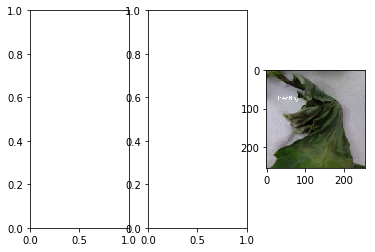

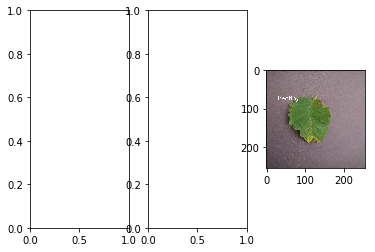

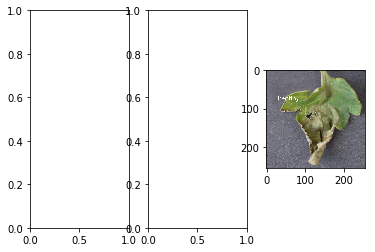

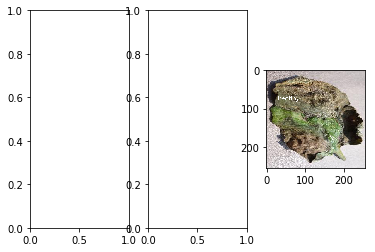

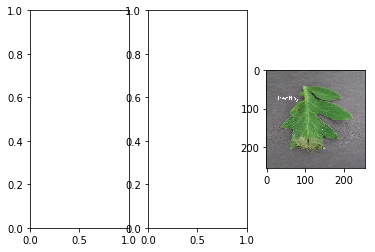

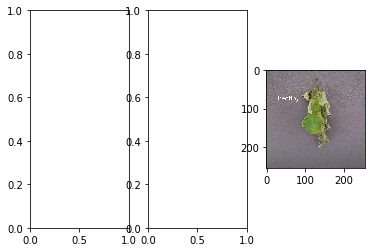

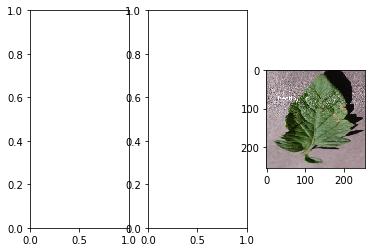

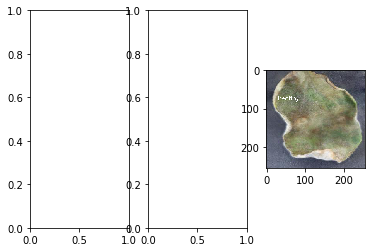

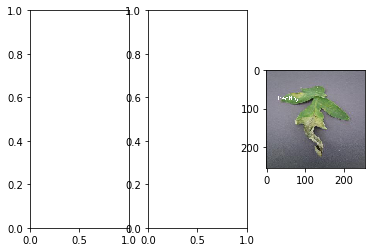

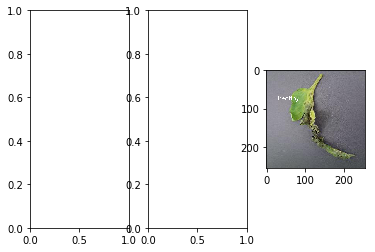

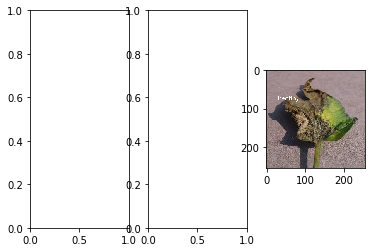

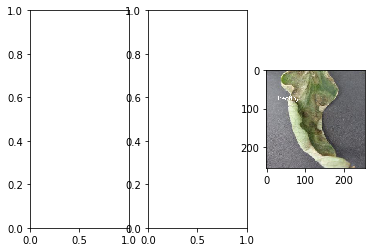

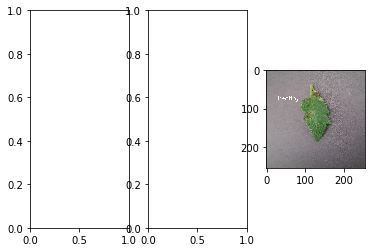

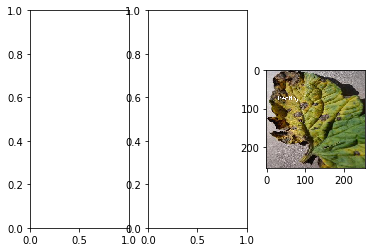

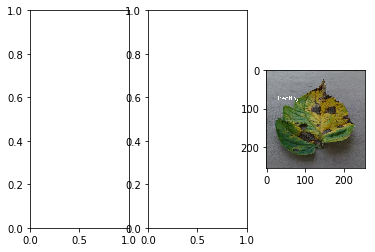

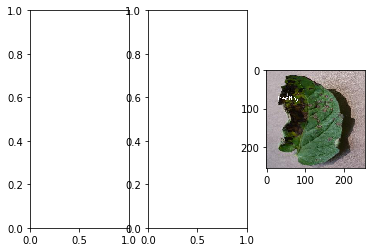

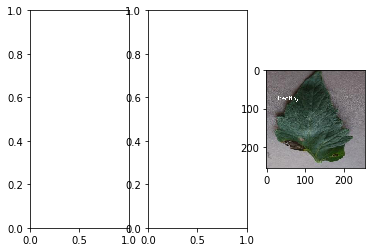

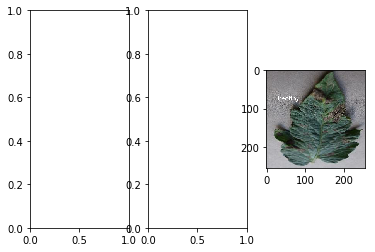

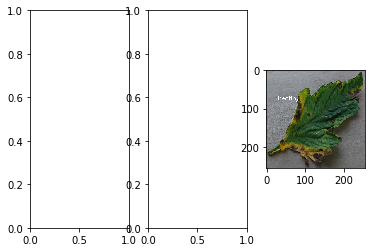

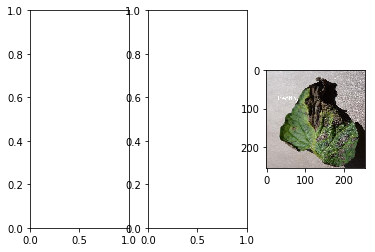

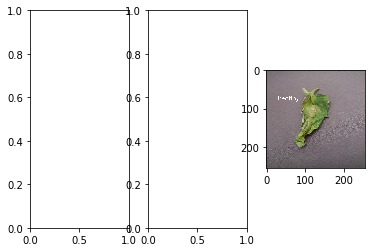

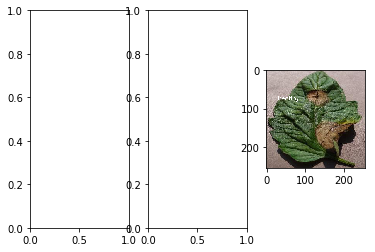

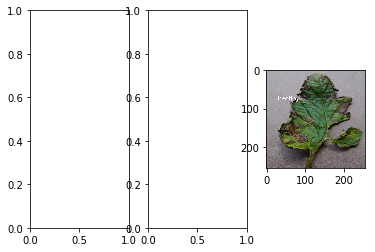

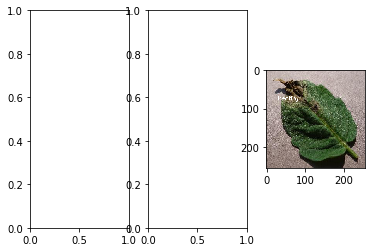

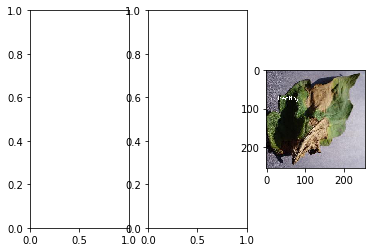

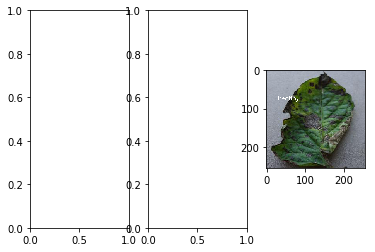

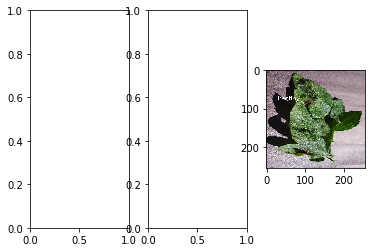

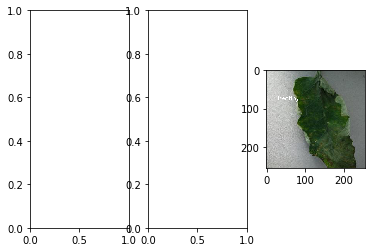

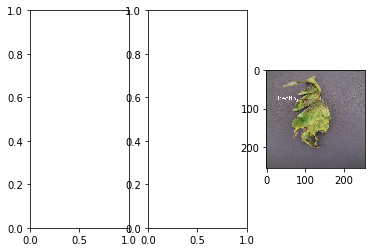

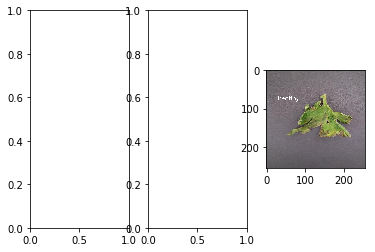

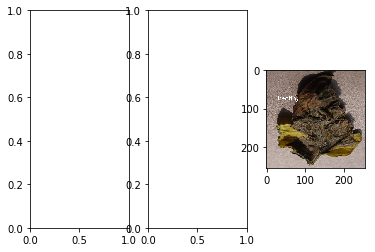

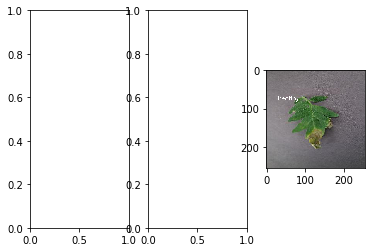

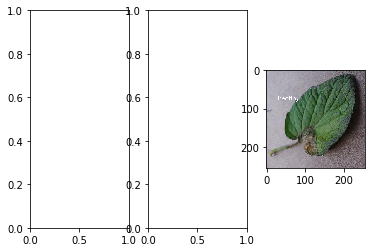

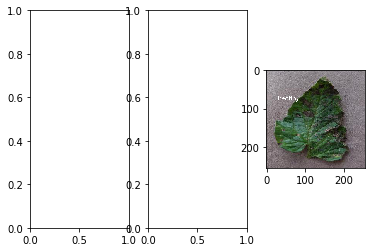

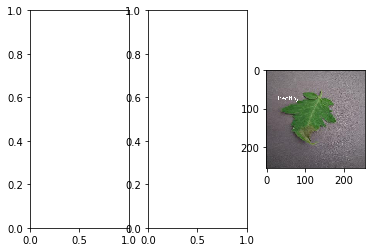

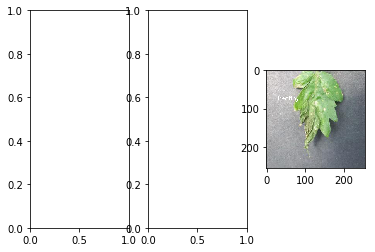

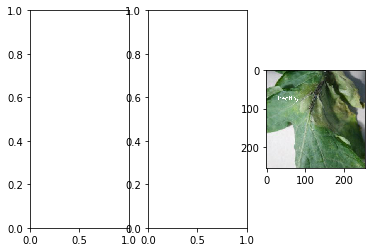

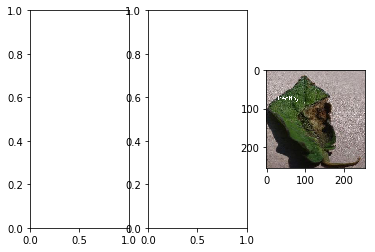

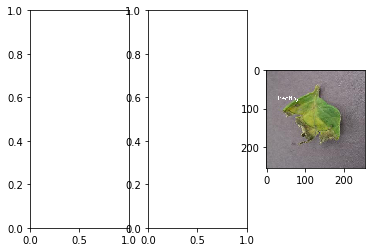

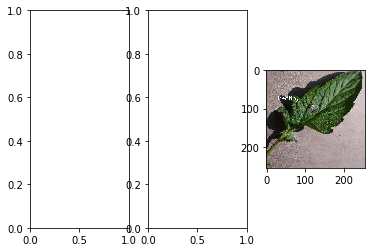

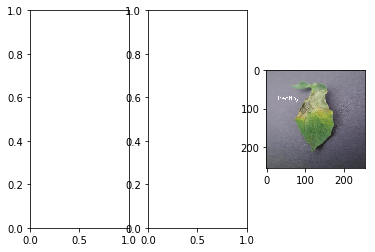

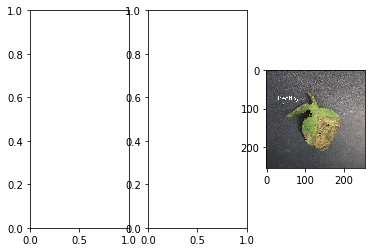

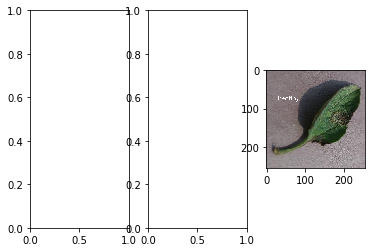

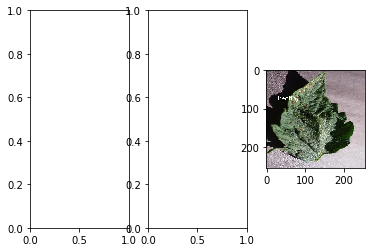

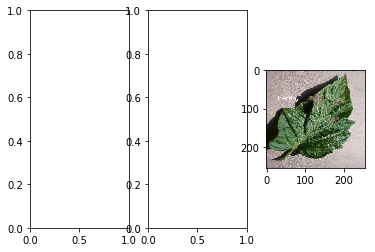

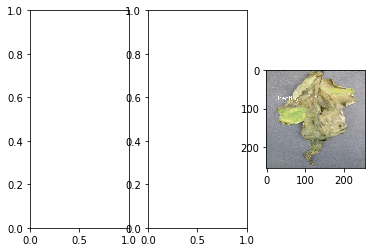

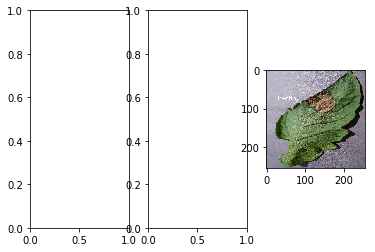

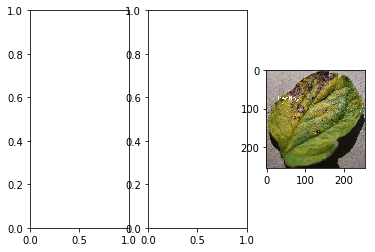

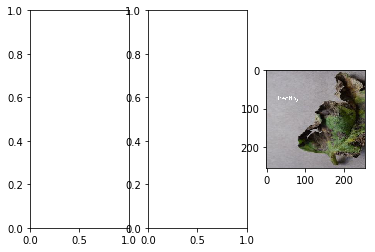

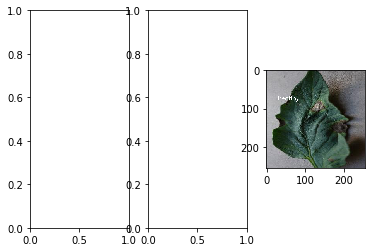

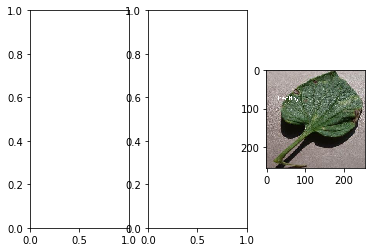

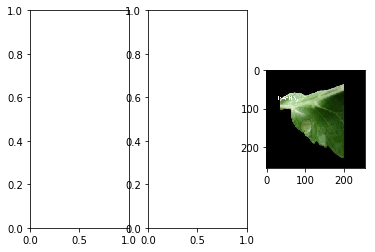

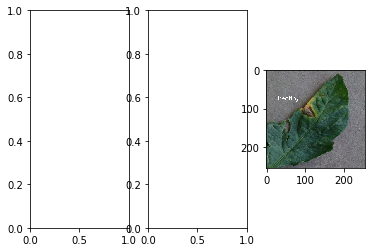

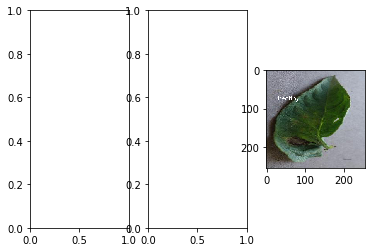

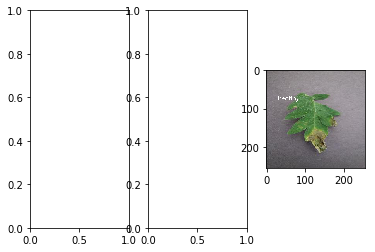

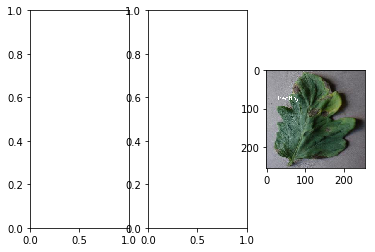

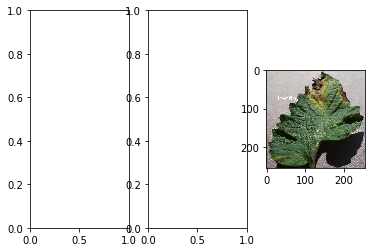

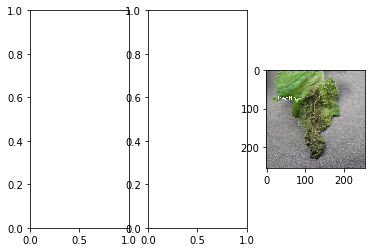

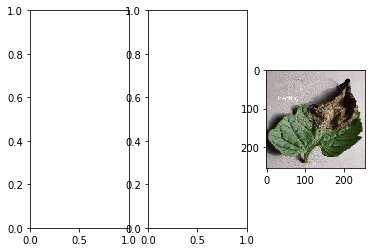

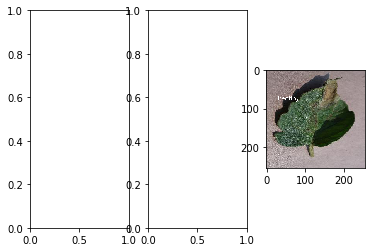

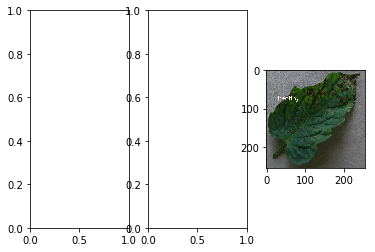

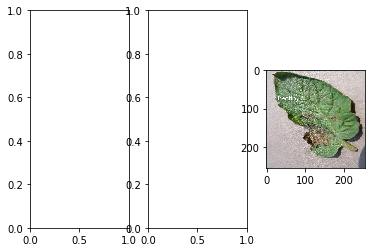

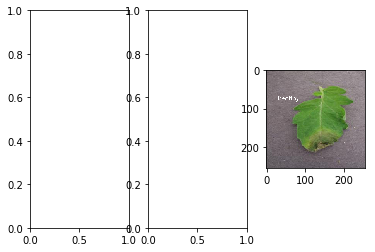

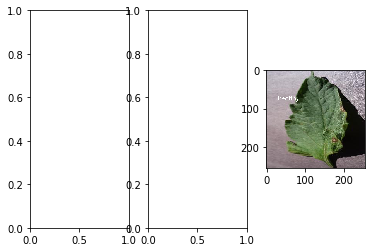

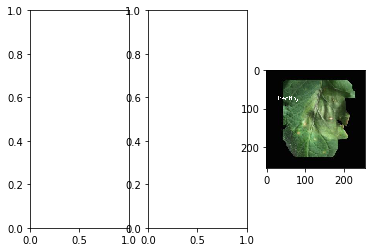

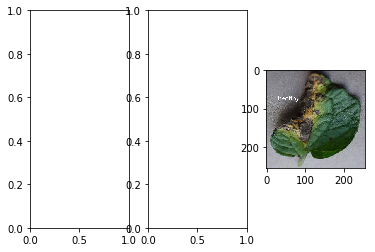

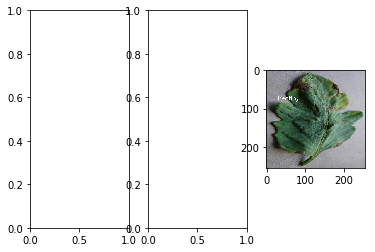

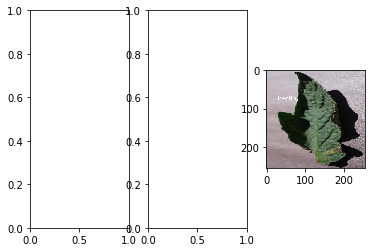

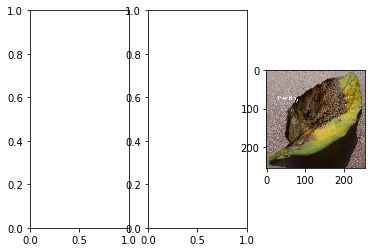

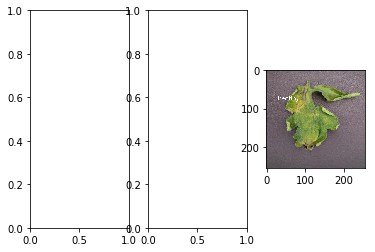

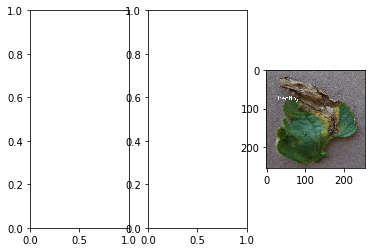

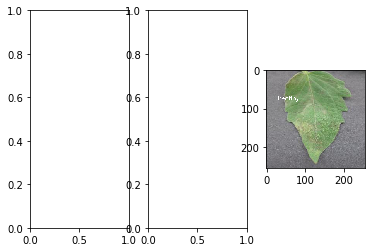

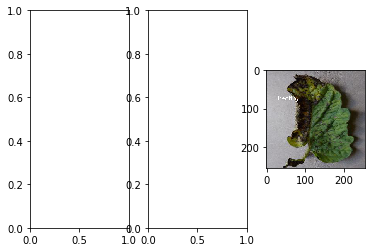

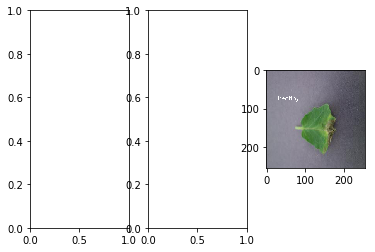

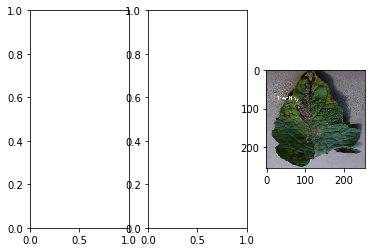

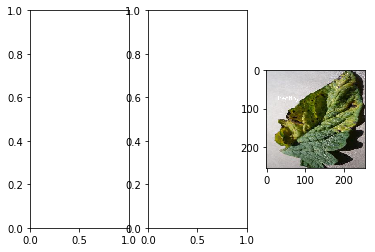

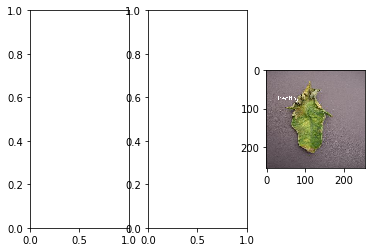

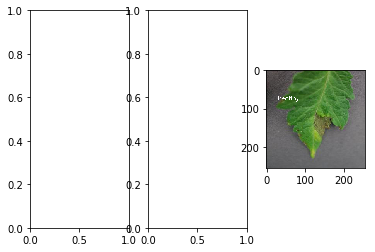

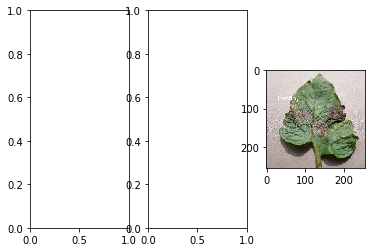

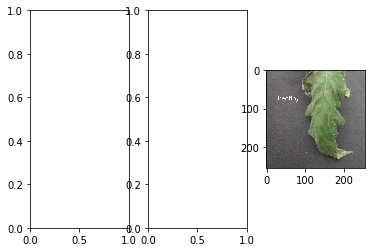

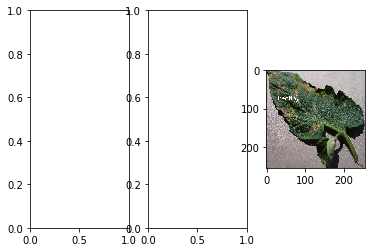

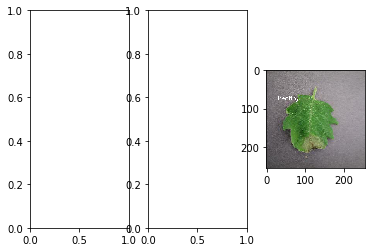

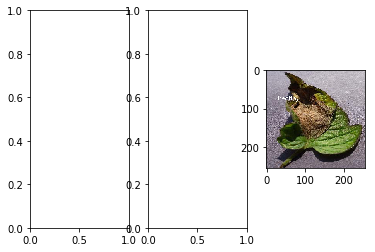

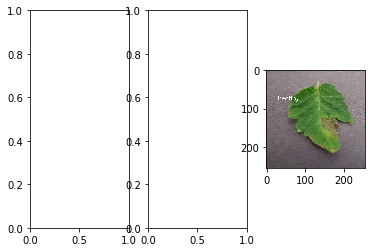

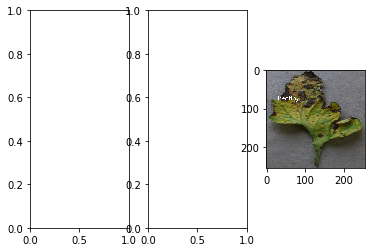

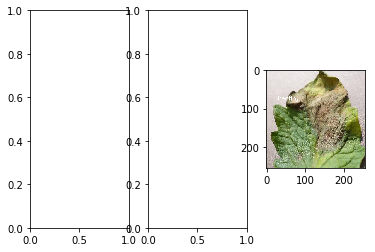

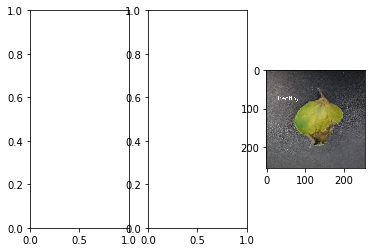

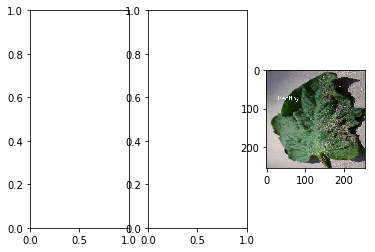

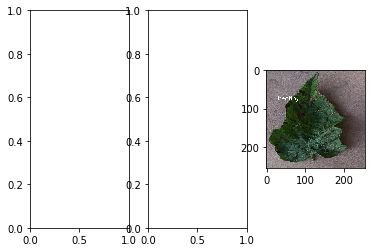

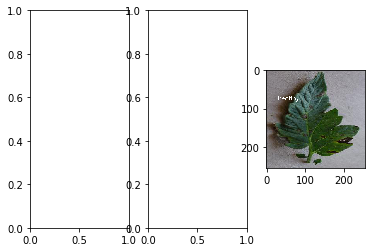

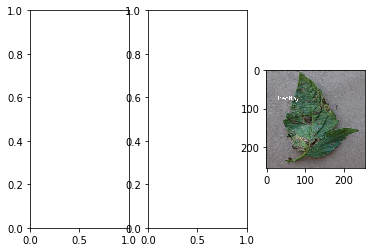

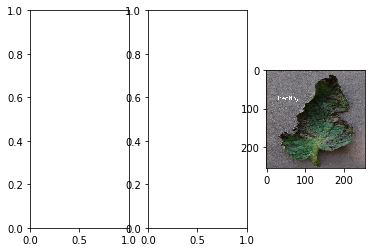

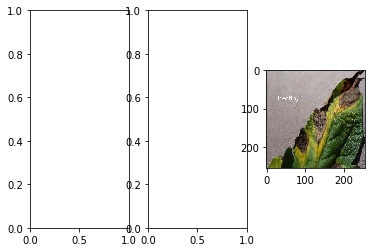

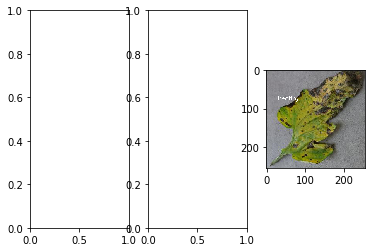

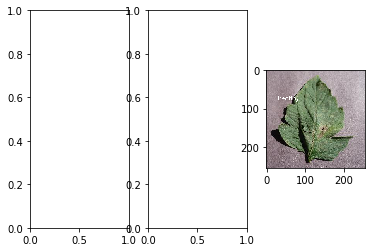

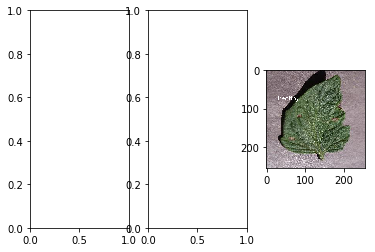

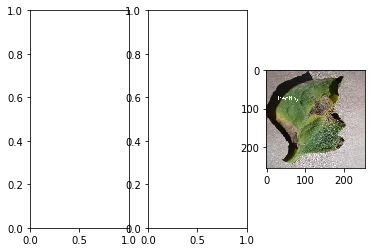

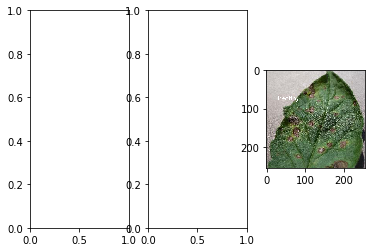

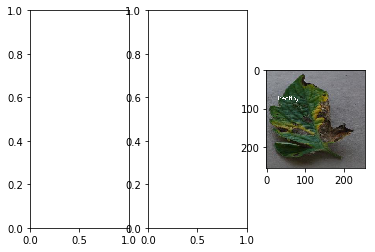

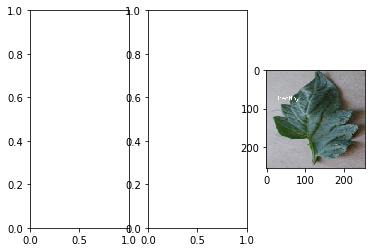

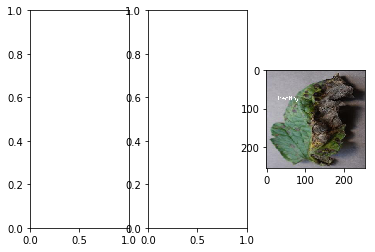

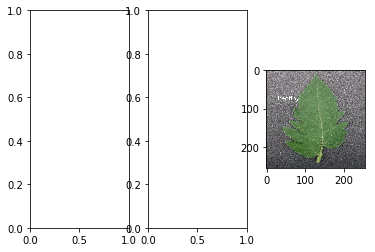

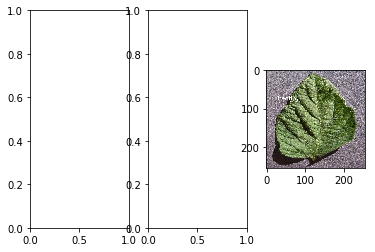

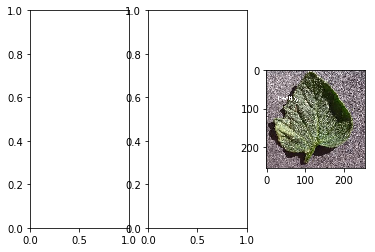

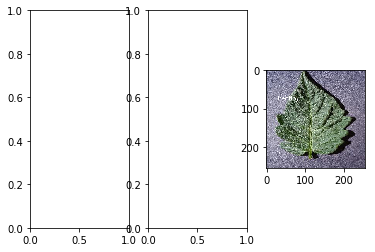

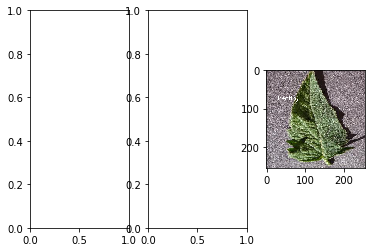

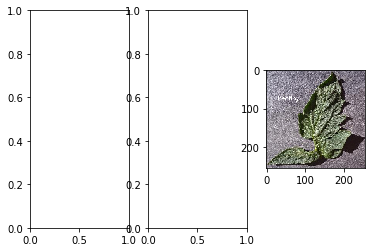

In [23]:
test_path="D:\\test_tomato1"
# labels = []
test_labels = os.listdir(test_path)
prediction_array=[]
global_features = []
# print(test_labels)
i, j = 0, 0
k = 0

for file in glob.glob(test_path + "/*.jpg"):
#     image=train_path + '/' + training_name+'/' + img
        ip_img = cv2.imread(file,cv2.IMREAD_UNCHANGED)
        img_out = cv2.cvtColor(ip_img, cv2.COLOR_RGB2GRAY)#Converting to grayscale
        img_arr = np.array(img_out) #Converting to array
#         plt.imshow(img_arr)
        # Finding LBP
        feat_lbp = local_binary_pattern(img_arr,8,1,'uniform') #Radius = 1, No. of neighbours = 8
        feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255)
        # Energy and Entropy of LBP feature
        lbp_hist,_ = np.histogram(feat_lbp,8)
        lbp_hist = np.array(lbp_hist,dtype=float)
        lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
        lbp_energy = np.sum(lbp_prob**2)
        lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
#         print('LBP energy = '+str(lbp_energy))
#         print('LBP entropy = '+str(lbp_entropy))
        # Finding GLCM features from co-occurance matrix
        gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True) # Co-occurance matrix
        contrast = greycoprops(gCoMat, prop='contrast')
        dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
        homogeneity = greycoprops(gCoMat, prop='homogeneity')
        energy = greycoprops(gCoMat, prop='energy')
        correlation = greycoprops(gCoMat, prop='correlation')
        feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
#         print('Contrast = '+str(contrast[0][0]))
#         print('Dissimilarity = '+str(dissimilarity[0][0]))
#         print('Homogeneity = '+str(homogeneity[0][0]))
#         print('Energy = '+str(energy[0][0]))
#         print('Correlation = '+str(correlation[0][0]))
        # Gabor filter
        gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
        gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
        # Displaying the filter response
        fig, ax = plt.subplots(1,3)    
#         ax[0].imshow(gaborFilt_real,cmap='gray')
#         ax[1].imshow(gaborFilt_imag,cmap='gray')
#         ax[2].imshow(gaborFilt,cmap='gray')
        # Energy and Entropy of Gabor filter response
        gabor_hist,_ = np.histogram(gaborFilt,8)
        gabor_hist = np.array(gabor_hist,dtype=float)
        gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
        gabor_energy = np.sum(gabor_prob**2)
        gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
        print('Gabor energy = '+str(gabor_energy))
        print('Gabor entropy = '+str(gabor_entropy))
        
        global_feature = np.hstack(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]))
        labels.append(current_label)
        global_features.append(global_feature)   
        prediction = clf.predict(np.array(global_feature).reshape(1,-1))[0]
        print('PREDICTION RESULT',prediction)
        prediction_array.append(prediction)
        print("[STATUS] PREDICTION ARRAY{}".format(np.array(prediction_array).shape))
        cv2.putText(ip_img, train_labels[prediction], (30,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
        # display the output image
        plt.imshow(cv2.cvtColor(ip_img, cv2.COLOR_BGR2RGB))
#         plt.show()

In [96]:
target.shape

(591,)

In [99]:
np.array(prediction_array).shape

(107,)

In [105]:
np.array(labels).shape

(591,)

In [106]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# # encode the target labels
# targetNames = np.unique(labels)
# print(labels)
le = LabelEncoder()
print('Label',le)
target = le.fit_transform(labels)
print(target.shape)
print ("[STATUS] training labels encoded...",np.array(labels).shape)

# normalize the feature vector in the range (0-1)
matrix=confusion_matrix(target,prediction_array)

Label LabelEncoder()
(591,)
[STATUS] training labels encoded... (591,)


ValueError: Found input variables with inconsistent numbers of samples: [591, 107]